# Author: Makayla McKibben
## Course: DSC550 Data Mining
## Assignment: Term Project Milestone 1
## Date: 10.06.2024

Global awareness and tolerance of mental health conditions have been increasing rapidly in the last few years. Mental illness is a topic that affects a great many people, but schizophrenia is still somewhat mysterious to a lot of everyday people. Portraying schizophrenia is done in a dramatized and dangerous way in most television shows and movies. They imply that everyone with schizophrenia is dangerous or violent and has no care for anybody else. It would likely shock many people how far that is from the truth. Whether you are directly impacted or have a spouse, relative, or friend who deals with a mental illness, the detriment of having a mental illness can touch nearly everyone.

Those with mental illnesses are often underserved. Seeing a doctor is costly, and some people cannot afford to try expensive medication after expensive medication or take expensive tests again and again. So, to predict the effectiveness of various medications for people with schizophrenia, we will look at a dataset from WebMD that provides recent, relevant information. The WebMD dataset has some demographic information and reviews of medications. Using sentiment analysis and NLP, we can use that demographics info and NLP analysis to predict the best medication for someone with schizophrenia of a specific demographic.

We will also be using several other datasets during the EDA phase of this project that address the need for repeated testing. These datasets are mixed, some from healthy people and some from people with schizophrenia. The datasets are EEG (electroencephalogram) readings. There are subtle differences in the EEGs between those with and those without schizophrenia. The goal with these datasets would be to find a reliable, broadly applicable way to determine if someone has schizophrenia with an improved accuracy. Many current models are hand-tailored to their datasets and so do not perform well on new data; the goal is to develop a model with wide applicability while maintaining high to excellent accuracy.

In [3]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import warnings
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

In [4]:
# Remove future warning
warnings.simplefilter(action='ignore', category=FutureWarning)

The goal of this exercise will be to find out if there are specific EEG patterns present in ill patients different from healthy patients which can reliably indicate if someone may have a schizophrenia spectrum illness. I have two datasets to combine.

EEG Database Description

There are two EEG data archives for two groups of subjects. The subjects were adolescents who had been screened by psychiatrist and devided into two groups: healthy (n = 39) and with symptoms of schizophrenia (n = 45).

Each file contains an EEG record for one subject. Each TXT file contains a column with EEG samples from 16 EEG channels (electrode positions). Each number in the column is an EEG amplitude (mkV) at distinct sample. First 7680 samples represent 1st channel, then 7680 - 2nd channel, ets. The sampling rate is 128 Hz, thus 7680 samples refer to 1 minute of EEG record.

The topographical positions of channel numbers are shown in the table and picture below.

1 - F7 2 - F3 3 - F4 4 - F8 5 - T3 6 - C3 7 - Cz 8 - C4 9 - T4 10 - T5 11 - P3 12 - Pz 13 - P4 14 - T6 15 - O1 16 - O2 Electrode positions

In [7]:
# Import datasets for healthy people
healthy_1a = pd.read_csv('EEG Schizophrenia/EEG Healthy/h01.csv')
healthy_2a = pd.read_csv('EEG Schizophrenia/EEG Healthy/h02.csv')
healthy_3a = pd.read_csv('EEG Schizophrenia/EEG Healthy/h03.csv')
healthy_4a = pd.read_csv('EEG Schizophrenia/EEG Healthy/h04.csv')
healthy_5a = pd.read_csv('EEG Schizophrenia/EEG Healthy/h05.csv')
healthy_6a = pd.read_csv('EEG Schizophrenia/EEG Healthy/h06.csv')
healthy_7a = pd.read_csv('EEG Schizophrenia/EEG Healthy/h07.csv')
healthy_8a = pd.read_csv('EEG Schizophrenia/EEG Healthy/h08.csv')
healthy_9a = pd.read_csv('EEG Schizophrenia/EEG Healthy/h09.csv')
healthy_10a = pd.read_csv('EEG Schizophrenia/EEG Healthy/h10.csv')
healthy_11a = pd.read_csv('EEG Schizophrenia/EEG Healthy/h11.csv')
healthy_12a = pd.read_csv('EEG Schizophrenia/EEG Healthy/h12.csv')
healthy_13a = pd.read_csv('EEG Schizophrenia/EEG Healthy/h13.csv')
healthy_14a = pd.read_csv('EEG Schizophrenia/EEG Healthy/h14.csv')


In [8]:
# Import second batch of datasets for healthy people
healthy_1b = pd.read_csv('EEG Schizophrenia/EEG Healthy/S10W1.eea', header = None, delim_whitespace = True)
healthy_2b = pd.read_csv('EEG Schizophrenia/EEG Healthy/s12w1.eea', header = None, delim_whitespace = True)
healthy_3b = pd.read_csv('EEG Schizophrenia/EEG Healthy/s152w1.eea', header = None, delim_whitespace = True)
healthy_4b = pd.read_csv('EEG Schizophrenia/EEG Healthy/S153W1.eea', header = None, delim_whitespace = True)
healthy_5b = pd.read_csv('EEG Schizophrenia/EEG Healthy/S154W1.eea', header = None, delim_whitespace = True)
healthy_6b = pd.read_csv('EEG Schizophrenia/EEG Healthy/S155W1.eea', header = None, delim_whitespace = True)
healthy_7b = pd.read_csv('EEG Schizophrenia/EEG Healthy/s157w1.eea', header = None, delim_whitespace = True)
healthy_8b = pd.read_csv('EEG Schizophrenia/EEG Healthy/s158w1.eea', header = None, delim_whitespace = True)
healthy_9b = pd.read_csv('EEG Schizophrenia/EEG Healthy/S163W1.eea', header = None, delim_whitespace = True)
healthy_10b = pd.read_csv('EEG Schizophrenia/EEG Healthy/S164W1.eea', header = None, delim_whitespace = True)
healthy_11b = pd.read_csv('EEG Schizophrenia/EEG Healthy/S165W1.eea', header = None, delim_whitespace = True)
healthy_12b = pd.read_csv('EEG Schizophrenia/EEG Healthy/S167W1.eea', header = None, delim_whitespace = True)
healthy_13b = pd.read_csv('EEG Schizophrenia/EEG Healthy/S169W.eea', header = None, delim_whitespace = True)
healthy_14b = pd.read_csv('EEG Schizophrenia/EEG Healthy/s170w1.eea', header = None, delim_whitespace = True)
healthy_15b = pd.read_csv('EEG Schizophrenia/EEG Healthy/s173w1.eea', header = None, delim_whitespace = True)
healthy_16b = pd.read_csv('EEG Schizophrenia/EEG Healthy/S174W1.eea', header = None, delim_whitespace = True)
healthy_17b = pd.read_csv('EEG Schizophrenia/EEG Healthy/s176w1.eea', header = None, delim_whitespace = True)
healthy_18b = pd.read_csv('EEG Schizophrenia/EEG Healthy/S177W1.eea', header = None, delim_whitespace = True)
healthy_19b = pd.read_csv('EEG Schizophrenia/EEG Healthy/s178w1.eea', header = None, delim_whitespace = True)
healthy_20b = pd.read_csv('EEG Schizophrenia/EEG Healthy/S179W1.eea', header = None, delim_whitespace = True)
healthy_21b = pd.read_csv('EEG Schizophrenia/EEG Healthy/S182W1.eea', header = None, delim_whitespace = True)
healthy_22b = pd.read_csv('EEG Schizophrenia/EEG Healthy/S18W1.eea', header = None, delim_whitespace = True)
healthy_23b = pd.read_csv('EEG Schizophrenia/EEG Healthy/S196W1.eea', header = None, delim_whitespace = True)
healthy_24b = pd.read_csv('EEG Schizophrenia/EEG Healthy/s20w1.eea', header = None, delim_whitespace = True)
healthy_25b = pd.read_csv('EEG Schizophrenia/EEG Healthy/S26W1.eea', header = None, delim_whitespace = True)
healthy_26b = pd.read_csv('EEG Schizophrenia/EEG Healthy/s27w1.eea', header = None, delim_whitespace = True)
healthy_27b = pd.read_csv('EEG Schizophrenia/EEG Healthy/S31W.eea', header = None, delim_whitespace = True)
healthy_28b = pd.read_csv('EEG Schizophrenia/EEG Healthy/S42W1.eea', header = None, delim_whitespace = True)
healthy_29b = pd.read_csv('EEG Schizophrenia/EEG Healthy/s43w1.eea', header = None, delim_whitespace = True)
healthy_30b = pd.read_csv('EEG Schizophrenia/EEG Healthy/S47W1.eea', header = None, delim_whitespace = True)
healthy_31b = pd.read_csv('EEG Schizophrenia/EEG Healthy/S50W.eea', header = None, delim_whitespace = True)
healthy_32b = pd.read_csv('EEG Schizophrenia/EEG Healthy/s53w1.eea', header = None, delim_whitespace = True)
healthy_33b = pd.read_csv('EEG Schizophrenia/EEG Healthy/S55W1.eea', header = None, delim_whitespace = True)
healthy_34b = pd.read_csv('EEG Schizophrenia/EEG Healthy/S59LW.eea', header = None, delim_whitespace = True)
healthy_35b = pd.read_csv('EEG Schizophrenia/EEG Healthy/S60W.eea', header = None, delim_whitespace = True)
healthy_36b = pd.read_csv('EEG Schizophrenia/EEG Healthy/S72W1.eea', header = None, delim_whitespace = True)
healthy_37b = pd.read_csv('EEG Schizophrenia/EEG Healthy/S78W.eea', header = None, delim_whitespace = True)
healthy_38b = pd.read_csv('EEG Schizophrenia/EEG Healthy/S85W1.eea', header = None, delim_whitespace = True)
healthy_39b = pd.read_csv('EEG Schizophrenia/EEG Healthy/s94w1.eea', header = None, delim_whitespace = True)

In [9]:
# Import schizophrenic EEGs
schizo_1a = pd.read_csv('EEG Schizophrenia/EEG Schizo/s01.csv', low_memory = False)
schizo_2a = pd.read_csv('EEG Schizophrenia/EEG Schizo/s02.csv', low_memory = False)
schizo_3a = pd.read_csv('EEG Schizophrenia/EEG Schizo/s03.csv', low_memory = False)
schizo_4a = pd.read_csv('EEG Schizophrenia/EEG Schizo/s04.csv', low_memory = False)
schizo_5a = pd.read_csv('EEG Schizophrenia/EEG Schizo/s05.csv', low_memory = False)
schizo_6a = pd.read_csv('EEG Schizophrenia/EEG Schizo/s06.csv', low_memory = False)
schizo_7a = pd.read_csv('EEG Schizophrenia/EEG Schizo/s07.csv', low_memory = False)
schizo_8a = pd.read_csv('EEG Schizophrenia/EEG Schizo/s08.csv', low_memory = False)
schizo_9a = pd.read_csv('EEG Schizophrenia/EEG Schizo/s09.csv', low_memory = False)
schizo_10a = pd.read_csv('EEG Schizophrenia/EEG Schizo/s10.csv', low_memory = False)
schizo_11a = pd.read_csv('EEG Schizophrenia/EEG Schizo/s11.csv', low_memory = False)
schizo_12a = pd.read_csv('EEG Schizophrenia/EEG Schizo/s12.csv', low_memory = False)
schizo_13a = pd.read_csv('EEG Schizophrenia/EEG Schizo/s13.csv', low_memory = False)
schizo_14a = pd.read_csv('EEG Schizophrenia/EEG Schizo/s14.csv', low_memory = False)

In [10]:
# Import second batch of schizophrenic EEGs
schizo_1b = pd.read_csv('EEG Schizophrenia/EEG Schizo/r416w1.eea', header = None, delim_whitespace = True)
schizo_2b = pd.read_csv('EEG Schizophrenia/EEG Schizo/113w1.eea', header = None, delim_whitespace = True)
schizo_3b = pd.read_csv('EEG Schizophrenia/EEG Schizo/342mw1.eea', header = None, delim_whitespace = True)
schizo_4b = pd.read_csv('EEG Schizophrenia/EEG Schizo/642w1.eea', header = None, delim_whitespace = True)
schizo_5b = pd.read_csv('EEG Schizophrenia/EEG Schizo/573w1.eea', header = None, delim_whitespace = True)
schizo_6b = pd.read_csv('EEG Schizophrenia/EEG Schizo/221w.eea', header = None, delim_whitespace = True)
schizo_7b = pd.read_csv('EEG Schizophrenia/EEG Schizo/312w1.eea', header = None, delim_whitespace = True)
schizo_8b = pd.read_csv('EEG Schizophrenia/EEG Schizo/454-1W.eea', header = None, delim_whitespace = True)
schizo_9b = pd.read_csv('EEG Schizophrenia/EEG Schizo/429w1.eea', header = None, delim_whitespace = True)
schizo_10b = pd.read_csv('EEG Schizophrenia/EEG Schizo/540w1.eea', header = None, delim_whitespace = True)
schizo_11b = pd.read_csv('EEG Schizophrenia/EEG Schizo/022w1.eea', header = None, delim_whitespace = True)
schizo_12b = pd.read_csv('EEG Schizophrenia/EEG Schizo/103w.eea', header = None, delim_whitespace = True)
schizo_13b = pd.read_csv('EEG Schizophrenia/EEG Schizo/508w1.eea', header = None, delim_whitespace = True)
schizo_14b = pd.read_csv('EEG Schizophrenia/EEG Schizo/307w1.eea', header = None, delim_whitespace = True)
schizo_15b = pd.read_csv('EEG Schizophrenia/EEG Schizo/088w1.eea', header = None, delim_whitespace = True)
schizo_16b = pd.read_csv('EEG Schizophrenia/EEG Schizo/156w1.eea', header = None, delim_whitespace = True)
schizo_17b = pd.read_csv('EEG Schizophrenia/EEG Schizo/515w1.eea', header = None, delim_whitespace = True)
schizo_18b = pd.read_csv('EEG Schizophrenia/EEG Schizo/192w.eea', header = None, delim_whitespace = True)
schizo_19b = pd.read_csv('EEG Schizophrenia/EEG Schizo/S084-1W.eea', header = None, delim_whitespace = True)
schizo_20b = pd.read_csv('EEG Schizophrenia/EEG Schizo/575w1.eea', header = None, delim_whitespace = True)
schizo_21b = pd.read_csv('EEG Schizophrenia/EEG Schizo/s425w1.eea', header = None, delim_whitespace = True)
schizo_22b = pd.read_csv('EEG Schizophrenia/EEG Schizo/s083w1.eea', header = None, delim_whitespace = True)
schizo_23b = pd.read_csv('EEG Schizophrenia/EEG Schizo/32w1.eea', header = None, delim_whitespace = True)
schizo_24b = pd.read_csv('EEG Schizophrenia/EEG Schizo/276w1.eea', header = None, delim_whitespace = True)
schizo_25b = pd.read_csv('EEG Schizophrenia/EEG Schizo/314w1.eea', header = None, delim_whitespace = True)
schizo_26b = pd.read_csv('EEG Schizophrenia/EEG Schizo/33w1.eea', header = None, delim_whitespace = True)
schizo_27b = pd.read_csv('EEG Schizophrenia/EEG Schizo/382w1.eea', header = None, delim_whitespace = True)
schizo_28b = pd.read_csv('EEG Schizophrenia/EEG Schizo/387-03w1.eea', header = None, delim_whitespace = True)
schizo_29b = pd.read_csv('EEG Schizophrenia/EEG Schizo/387-02w1.eea', header = None, delim_whitespace = True)
schizo_30b = pd.read_csv('EEG Schizophrenia/EEG Schizo/s351w.eea', header = None, delim_whitespace = True)
schizo_31b = pd.read_csv('EEG Schizophrenia/EEG Schizo/155w1.eea', header = None, delim_whitespace = True)
schizo_32b = pd.read_csv('EEG Schizophrenia/EEG Schizo/219w1.eea', header = None, delim_whitespace = True)
schizo_33b = pd.read_csv('EEG Schizophrenia/EEG Schizo/510-1W.eea', header = None, delim_whitespace = True)
schizo_34b = pd.read_csv('EEG Schizophrenia/EEG Schizo/401w1.eea', header = None, delim_whitespace = True)
schizo_35b = pd.read_csv('EEG Schizophrenia/EEG Schizo/517w1.eea', header = None, delim_whitespace = True)
schizo_36b = pd.read_csv('EEG Schizophrenia/EEG Schizo/585w1.eea', header = None, delim_whitespace = True)
schizo_37b = pd.read_csv('EEG Schizophrenia/EEG Schizo/548w.eea', header = None, delim_whitespace = True)
schizo_38b = pd.read_csv('EEG Schizophrenia/EEG Schizo/586w1.eea', header = None, delim_whitespace = True)
schizo_39b = pd.read_csv('EEG Schizophrenia/EEG Schizo/249w1.eea', header = None, delim_whitespace = True)
schizo_40b = pd.read_csv('EEG Schizophrenia/EEG Schizo/423w.eea', header = None, delim_whitespace = True)
schizo_41b = pd.read_csv('EEG Schizophrenia/EEG Schizo/485w1.eea', header = None, delim_whitespace = True)
schizo_42b = pd.read_csv('EEG Schizophrenia/EEG Schizo/r229w1.eea', header = None, delim_whitespace = True)
schizo_43b = pd.read_csv('EEG Schizophrenia/EEG Schizo/719w1.eea', header = None, delim_whitespace = True)
schizo_44b = pd.read_csv('EEG Schizophrenia/EEG Schizo/683w1.eea', header = None, delim_whitespace = True)
schizo_45b = pd.read_csv('EEG Schizophrenia/EEG Schizo/509w1.eea', header = None, delim_whitespace = True)

In [11]:
# Look at structure of 'a' files
schizo_1a

,Fp2,F8,T4,T6,O2,Fp1,F7,T3,T5,O1,F4,C4,P4,F3,C3,P3,Fz,Cz,Pz
0,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09
1,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09
2,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09
3,2.500000e-09,2.500000e-09,2.500000e-09,3.083103e-07,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,3.083103e-07,2.500000e-09,2.500000e-09,2.500000e-09,-1.504051e-07,-3.033103e-07,2.500000e-09,-6.091205e-07,-3.033103e-07,-6.091205e-07,-7.620257e-07
4,2.500000e-09,2.500000e-09,2.500000e-09,1.554051e-07,2.500000e-09,2.500000e-09,2.500000e-09,1.554051e-07,3.083103e-07,-3.033103e-07,2.500000e-09,2.500000e-09,-3.033103e-07,-3.033103e-07,-1.504051e-07,-6.091205e-07,-4.562154e-07,-7.620257e-07,-7.620257e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211245,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09
211246,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09
211247,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09
211248,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09,2.500000e-09


In [12]:
# Look at the structure of the b type files
schizo_1b

,0
0,289.13
1,109.76
2,29.45
3,-30.79
4,-30.79
...,...
122875,639.82
122876,639.82
122877,479.20
122878,199.44


In [13]:
# Import second batch of schizophrenic EEGs
schizo_1b = pd.read_csv('EEG Schizophrenia/EEG Schizo/r416w1.eea', header = None, delim_whitespace = True)
schizo_2b = pd.read_csv('EEG Schizophrenia/EEG Schizo/113w1.eea', header = None, delim_whitespace = True)
schizo_3b = pd.read_csv('EEG Schizophrenia/EEG Schizo/342mw1.eea', header = None, delim_whitespace = True)
schizo_4b = pd.read_csv('EEG Schizophrenia/EEG Schizo/642w1.eea', header = None, delim_whitespace = True)
schizo_5b = pd.read_csv('EEG Schizophrenia/EEG Schizo/573w1.eea', header = None, delim_whitespace = True)
schizo_6b = pd.read_csv('EEG Schizophrenia/EEG Schizo/221w.eea', header = None, delim_whitespace = True)
schizo_7b = pd.read_csv('EEG Schizophrenia/EEG Schizo/312w1.eea', header = None, delim_whitespace = True)
schizo_8b = pd.read_csv('EEG Schizophrenia/EEG Schizo/454-1W.eea', header = None, delim_whitespace = True)
schizo_9b = pd.read_csv('EEG Schizophrenia/EEG Schizo/429w1.eea', header = None, delim_whitespace = True)
schizo_10b = pd.read_csv('EEG Schizophrenia/EEG Schizo/540w1.eea', header = None, delim_whitespace = True)
schizo_11b = pd.read_csv('EEG Schizophrenia/EEG Schizo/022w1.eea', header = None, delim_whitespace = True)
schizo_12b = pd.read_csv('EEG Schizophrenia/EEG Schizo/103w.eea', header = None, delim_whitespace = True)
schizo_13b = pd.read_csv('EEG Schizophrenia/EEG Schizo/508w1.eea', header = None, delim_whitespace = True)
schizo_14b = pd.read_csv('EEG Schizophrenia/EEG Schizo/307w1.eea', header = None, delim_whitespace = True)
schizo_15b = pd.read_csv('EEG Schizophrenia/EEG Schizo/088w1.eea', header = None, delim_whitespace = True)
schizo_16b = pd.read_csv('EEG Schizophrenia/EEG Schizo/156w1.eea', header = None, delim_whitespace = True)
schizo_17b = pd.read_csv('EEG Schizophrenia/EEG Schizo/515w1.eea', header = None, delim_whitespace = True)
schizo_18b = pd.read_csv('EEG Schizophrenia/EEG Schizo/192w.eea', header = None, delim_whitespace = True)
schizo_19b = pd.read_csv('EEG Schizophrenia/EEG Schizo/S084-1W.eea', header = None, delim_whitespace = True)
schizo_20b = pd.read_csv('EEG Schizophrenia/EEG Schizo/575w1.eea', header = None, delim_whitespace = True)
schizo_21b = pd.read_csv('EEG Schizophrenia/EEG Schizo/s425w1.eea', header = None, delim_whitespace = True)
schizo_22b = pd.read_csv('EEG Schizophrenia/EEG Schizo/s083w1.eea', header = None, delim_whitespace = True)
schizo_23b = pd.read_csv('EEG Schizophrenia/EEG Schizo/32w1.eea', header = None, delim_whitespace = True)
schizo_24b = pd.read_csv('EEG Schizophrenia/EEG Schizo/276w1.eea', header = None, delim_whitespace = True)
schizo_25b = pd.read_csv('EEG Schizophrenia/EEG Schizo/314w1.eea', header = None, delim_whitespace = True)
schizo_26b = pd.read_csv('EEG Schizophrenia/EEG Schizo/33w1.eea', header = None, delim_whitespace = True)
schizo_27b = pd.read_csv('EEG Schizophrenia/EEG Schizo/382w1.eea', header = None, delim_whitespace = True)
schizo_28b = pd.read_csv('EEG Schizophrenia/EEG Schizo/387-03w1.eea', header = None, delim_whitespace = True)
schizo_29b = pd.read_csv('EEG Schizophrenia/EEG Schizo/387-02w1.eea', header = None, delim_whitespace = True)
schizo_30b = pd.read_csv('EEG Schizophrenia/EEG Schizo/s351w.eea', header = None, delim_whitespace = True)
schizo_31b = pd.read_csv('EEG Schizophrenia/EEG Schizo/155w1.eea', header = None, delim_whitespace = True)
schizo_32b = pd.read_csv('EEG Schizophrenia/EEG Schizo/219w1.eea', header = None, delim_whitespace = True)
schizo_33b = pd.read_csv('EEG Schizophrenia/EEG Schizo/510-1W.eea', header = None, delim_whitespace = True)
schizo_34b = pd.read_csv('EEG Schizophrenia/EEG Schizo/401w1.eea', header = None, delim_whitespace = True)
schizo_35b = pd.read_csv('EEG Schizophrenia/EEG Schizo/517w1.eea', header = None, delim_whitespace = True)
schizo_36b = pd.read_csv('EEG Schizophrenia/EEG Schizo/585w1.eea', header = None, delim_whitespace = True)
schizo_37b = pd.read_csv('EEG Schizophrenia/EEG Schizo/548w.eea', header = None, delim_whitespace = True)
schizo_38b = pd.read_csv('EEG Schizophrenia/EEG Schizo/586w1.eea', header = None, delim_whitespace = True)
schizo_39b = pd.read_csv('EEG Schizophrenia/EEG Schizo/249w1.eea', header = None, delim_whitespace = True)
schizo_40b = pd.read_csv('EEG Schizophrenia/EEG Schizo/423w.eea', header = None, delim_whitespace = True)
schizo_41b = pd.read_csv('EEG Schizophrenia/EEG Schizo/485w1.eea', header = None, delim_whitespace = True)
schizo_42b = pd.read_csv('EEG Schizophrenia/EEG Schizo/r229w1.eea', header = None, delim_whitespace = True)
schizo_43b = pd.read_csv('EEG Schizophrenia/EEG Schizo/719w1.eea', header = None, delim_whitespace = True)
schizo_44b = pd.read_csv('EEG Schizophrenia/EEG Schizo/683w1.eea', header = None, delim_whitespace = True)
schizo_45b = pd.read_csv('EEG Schizophrenia/EEG Schizo/509w1.eea', header = None, delim_whitespace = True)

In [14]:
# Make list of all EEG dfs
schizo_list = []
for i in range(1, 46):
    iter = str(i)
    file = ('schizo_' + iter + 'b')
    schizo_list.append(file)
schizo_list

['schizo_1b',
 'schizo_2b',
 'schizo_3b',
 'schizo_4b',
 'schizo_5b',
 'schizo_6b',
 'schizo_7b',
 'schizo_8b',
 'schizo_9b',
 'schizo_10b',
 'schizo_11b',
 'schizo_12b',
 'schizo_13b',
 'schizo_14b',
 'schizo_15b',
 'schizo_16b',
 'schizo_17b',
 'schizo_18b',
 'schizo_19b',
 'schizo_20b',
 'schizo_21b',
 'schizo_22b',
 'schizo_23b',
 'schizo_24b',
 'schizo_25b',
 'schizo_26b',
 'schizo_27b',
 'schizo_28b',
 'schizo_29b',
 'schizo_30b',
 'schizo_31b',
 'schizo_32b',
 'schizo_33b',
 'schizo_34b',
 'schizo_35b',
 'schizo_36b',
 'schizo_37b',
 'schizo_38b',
 'schizo_39b',
 'schizo_40b',
 'schizo_41b',
 'schizo_42b',
 'schizo_43b',
 'schizo_44b',
 'schizo_45b']

In [15]:
electrode_pos_b = ['F7', 'F3', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']
electrode_pos_b

['F7',
 'F3',
 'F4',
 'F8',
 'T3',
 'C3',
 'Cz',
 'C4',
 'T4',
 'T5',
 'P3',
 'Pz',
 'P4',
 'T6',
 'O1',
 'O2']

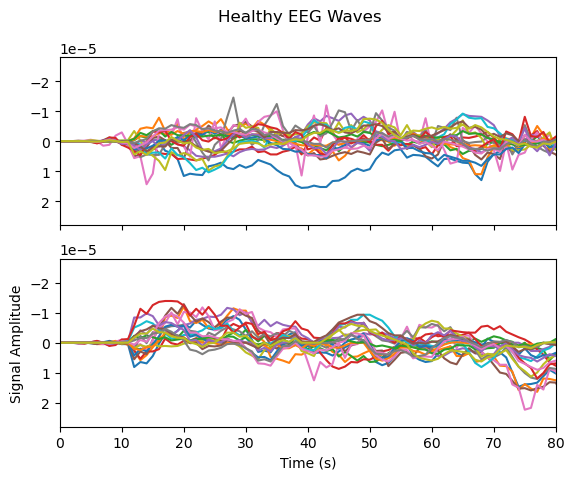

In [16]:
# Plot two healthy people EEGs
fig, (ax1, ax2) = plt.subplots(2, sharex = True, sharey = True)
plt.ylim(0.000028, -0.000028)
plt.xlim(0,80)
ax1.plot(healthy_8a)
ax2.plot(healthy_5a)
plt.suptitle('Healthy EEG Waves')
plt.ylabel('Signal Amplitude')
plt.xlabel('Time (s)')
plt.show()

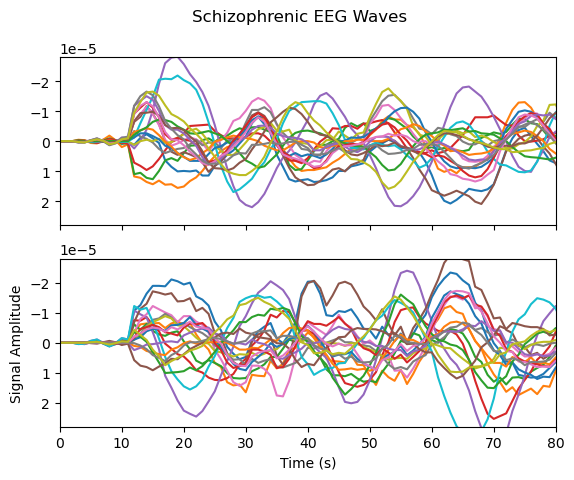

In [17]:
# Plot two schizophrenic EEGs
fig, (ax1, ax2) = plt.subplots(2, sharex = True, sharey = True)
plt.ylim(0.000028, -0.000028)
plt.xlim(0,80)
ax1.plot(schizo_8a)
ax2.plot(schizo_6a)
plt.suptitle('Schizophrenic EEG Waves')
plt.ylabel('Signal Amplitude')
plt.xlabel('Time (s)')
plt.show()

The graphs above represent the first minute and twenty seconds of EEG data from two healthy people and then two schizophrenic people. Those two figures show that the schizophrenic waves have a significantly larger amplitude than healthy EEG waves in the first minute and twenty seconds of data collection. The waves are also much smoother for the schizophrenic readings compared to the healthy readings without clear sinusoidal waveforms.

In [19]:
# Read data into df and view first 8 rows
webmd_reviews = pd.read_csv('Psychiatric_Drug_Reviews_WebMD.csv')
webmd_reviews.head(8)

,Unnamed: 0,drug_name,date,age,gender,time_on_drug,reviewer_type,condition,rating_overall,rating_effectiveness,rating_ease_of_use,rating_satisfaction,text
0,0,Sertraline Oral,5/12/2024,45-54,Female,1 to less than 2 years,Patient,Posttraumatic Stress Syndrome,5.0,5,5,5,It's almost two years now and it has been so e...
1,1,Sertraline Oral,4/21/2024,35-44,Female,less than 1 month,Patient,Depression,1.0,1,1,1,Iv been on this 4 weeks and iv never felt so a...
2,2,Sertraline Oral,4/16/2024,25-34,Female,2 to less than 5 years,Patient,Repeated Episodes of Anxiety,4.3,4,4,5,Been taking sertraline for past 3 years. Had n...
3,3,Sertraline Oral,4/11/2024,45-54,Male,less than 1 month,Patient,Panic Disorder,1.7,1,3,1,"Of course, take this with a pinch of salt beca..."
4,4,Sertraline Oral,4/8/2024,13-18,Female,NaN,Patient,Major Depressive Disorder,3.0,2,4,3,used for a while saw no effects.
5,5,Sertraline Oral,3/29/2024,45-54,Female,less than 1 month,Patient,Posttraumatic Stress Syndrome,2.3,1,5,1,I had a concussion 9 months before I took this...
6,6,Sertraline Oral,3/27/2024,45-54,Female,1 to 6 months,Patient,Bipolar Depression,5.0,5,5,5,I was skeptical at first because I have been o...
7,7,Sertraline Oral,3/26/2024,12-Jul,Male,1 to 6 months,Caregiver,Repeated Episodes of Anxiety,5.0,5,5,5,My 9yo has moderate ADHD and this year the inc...


In [20]:
# Define lambda function and make all text lowercase in a new dataframe
lowered_reviews = webmd_reviews.apply(lambda x: x.astype(str).str.lower())
lowered_reviews

,Unnamed: 0,drug_name,date,age,gender,time_on_drug,reviewer_type,condition,rating_overall,rating_effectiveness,rating_ease_of_use,rating_satisfaction,text
0,0,sertraline oral,5/12/2024,45-54,female,1 to less than 2 years,patient,posttraumatic stress syndrome,5.0,5,5,5,it's almost two years now and it has been so e...
1,1,sertraline oral,4/21/2024,35-44,female,less than 1 month,patient,depression,1.0,1,1,1,iv been on this 4 weeks and iv never felt so a...
2,2,sertraline oral,4/16/2024,25-34,female,2 to less than 5 years,patient,repeated episodes of anxiety,4.3,4,4,5,been taking sertraline for past 3 years. had n...
3,3,sertraline oral,4/11/2024,45-54,male,less than 1 month,patient,panic disorder,1.7,1,3,1,"of course, take this with a pinch of salt beca..."
4,4,sertraline oral,4/8/2024,13-18,female,nan,patient,major depressive disorder,3.0,2,4,3,used for a while saw no effects.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61315,61315,risperdal oral,9/25/2007,25-34,female,less than 1 month,patient,additional medications to treat depression,1.7,1,3,1,"i got so dizzy, sleepy with slurred speech, af..."
61316,61316,risperdal oral,9/25/2007,12-jul,male,1 to less than 2 years,caregiver,bipolar i disorder with most recent episode mixed,2.0,1,4,1,"while the drug is easy to administer, there wa..."
61317,61317,risperdal oral,9/22/2007,19-24,female,1 to 6 months,patient,bipolar i disorder with most recent episode mixed,3.7,3,5,3,not much significant improvement in mood. made...
61318,61318,risperdal oral,9/19/2007,55-64,male,1 to 6 months,patient,additional medications to treat depression,4.3,4,5,4,"i've had chronic, ""refractory"" depression for ..."


In [21]:
# Drop the column that is the same as the index
lowered_reviews = lowered_reviews.drop(lowered_reviews.columns[0], axis = 1)
lowered_reviews

,drug_name,date,age,gender,time_on_drug,reviewer_type,condition,rating_overall,rating_effectiveness,rating_ease_of_use,rating_satisfaction,text
0,sertraline oral,5/12/2024,45-54,female,1 to less than 2 years,patient,posttraumatic stress syndrome,5.0,5,5,5,it's almost two years now and it has been so e...
1,sertraline oral,4/21/2024,35-44,female,less than 1 month,patient,depression,1.0,1,1,1,iv been on this 4 weeks and iv never felt so a...
2,sertraline oral,4/16/2024,25-34,female,2 to less than 5 years,patient,repeated episodes of anxiety,4.3,4,4,5,been taking sertraline for past 3 years. had n...
3,sertraline oral,4/11/2024,45-54,male,less than 1 month,patient,panic disorder,1.7,1,3,1,"of course, take this with a pinch of salt beca..."
4,sertraline oral,4/8/2024,13-18,female,nan,patient,major depressive disorder,3.0,2,4,3,used for a while saw no effects.
...,...,...,...,...,...,...,...,...,...,...,...,...
61315,risperdal oral,9/25/2007,25-34,female,less than 1 month,patient,additional medications to treat depression,1.7,1,3,1,"i got so dizzy, sleepy with slurred speech, af..."
61316,risperdal oral,9/25/2007,12-jul,male,1 to less than 2 years,caregiver,bipolar i disorder with most recent episode mixed,2.0,1,4,1,"while the drug is easy to administer, there wa..."
61317,risperdal oral,9/22/2007,19-24,female,1 to 6 months,patient,bipolar i disorder with most recent episode mixed,3.7,3,5,3,not much significant improvement in mood. made...
61318,risperdal oral,9/19/2007,55-64,male,1 to 6 months,patient,additional medications to treat depression,4.3,4,5,4,"i've had chronic, ""refractory"" depression for ..."


In [22]:
# Find all the potential conditions we could match in the dataframe
unique_conditions = lowered_reviews['condition'].unique()
unique_conditions

array(['posttraumatic stress syndrome', 'depression',
       'repeated episodes of anxiety', 'panic disorder',
       'major depressive disorder', 'bipolar depression',
       'depressed mood disorder occurring every year at the same time',
       'anxiousness associated with depression', 'other',
       'obsessive compulsive disorder',
       'extreme apprehension or fear of social interaction',
       'premenstrual disorder with a state of unhappiness',
       'premature ejection of semen', 'problem behavior', 'schizophrenia',
       'osteoporosis', 'aggressive behavior', 'binge eating disorder',
       'acute repetitive seizures', 'anxious', 'muscle spasm',
       'neuropathic pain',
       'attention deficit disorder with hyperactivity', 'stop smoking',
       'manic', 'convulsive seizures', 'facial nerve pain',
       'bipolar i disorder with most recent episode mixed', 'nerve pain',
       'bipolar disorder in remission', 'epileptic seizure', 'tonic',
       'prevention of seizur

In [23]:
# Separate only the entries having to do with schizophrenia
cond = 'schizo'
schizo = [c for c in unique_conditions if c.startswith(cond)]
schizo

['schizophrenia', 'schizophrenia with mood changes']

In [24]:
# Keep only those who have schizophrenia with no mood disorder
schizophrenia_reviews = lowered_reviews[(lowered_reviews['condition'] == 'schizophrenia')]
schizophrenia_reviews

,drug_name,date,age,gender,time_on_drug,reviewer_type,condition,rating_overall,rating_effectiveness,rating_ease_of_use,rating_satisfaction,text
618,haloperidol intensol oral,10/5/2010,35-44,male,1 to 6 months,patient,schizophrenia,4.7,5,5,4,it makes me feel restless and more nervous
1766,haloperidol lactate oral,8/26/2009,13-18,female,1 to less than 2 years,caregiver,schizophrenia,2.3,1,4,2,my daughter's halucinations are still present ...
1769,trifluoperazine oral,2/7/2014,45-54,female,less than 1 month,caregiver,schizophrenia,1.0,1,1,1,my son have been diagnosed with schizophrenia ...
4034,chlorpromazine injection,6/19/2009,45-54,female,5 to less than 10 years,patient,schizophrenia,1.0,1,1,1,in fact my mother is using it and it caused se...
4416,loxapine succinate oral,5/4/2011,45-54,male,nan,patient,schizophrenia,5.0,5,5,5,i've been on loxapine since 1988 and i owe my ...
...,...,...,...,...,...,...,...,...,...,...,...,...
61291,risperdal oral,11/23/2007,55-64,female,5 to less than 10 years,patient,schizophrenia,3.3,3,4,3,i have been on risperdal for 7 years and i hav...
61295,risperdal oral,11/18/2007,35-44,female,1 to less than 2 years,caregiver,schizophrenia,4.7,5,5,4,my husband has taken risperdal for a year & a ...
61302,risperdal oral,10/31/2007,25-34,male,2 to less than 5 years,patient,schizophrenia,3.3,3,4,3,the reoccurence is disturbing
61307,risperdal oral,10/19/2007,25-34,female,2 to less than 5 years,patient,schizophrenia,4.3,4,5,4,weight gain is an issue for me. also my eyes s...


In [25]:
# Keep only those who have schizophrenia and a mood disorder
schizoaffective_reviews = lowered_reviews[(lowered_reviews['condition'] == 'schizophrenia with mood changes')]
schizoaffective_reviews

,drug_name,date,age,gender,time_on_drug,reviewer_type,condition,rating_overall,rating_effectiveness,rating_ease_of_use,rating_satisfaction,text
4602,paliperidone oral,9/30/2018,19-24,female,1 to less than 2 years,patient,schizophrenia with mood changes,5.0,5,5,5,this medication has changed my life i love yhi...
4604,paliperidone oral,9/24/2017,35-44,nan,1 to 6 months,patient,schizophrenia with mood changes,5.0,5,5,5,i've been on paliperidone for about a month no...
4605,paliperidone oral,2/23/2017,35-44,female,1 to 6 months,patient,schizophrenia with mood changes,4.3,4,4,5,i have been on all the other antipsychotics an...
4609,paliperidone oral,5/10/2012,35-44,female,1 to 6 months,patient,schizophrenia with mood changes,4.7,5,5,4,this medication has helped me so much. i have ...
4620,invega oral,1/14/2023,19-24,female,less than 1 month,patient,schizophrenia with mood changes,1.7,1,3,1,"it made my paranoia so much worse, my negative..."
4625,invega oral,1/18/2022,35-44,nan,2 to less than 5 years,patient,schizophrenia with mood changes,4.0,5,5,2,this drug completely cured my paranoid delusio...
4644,invega oral,3/14/2014,55-64,female,1 to less than 2 years,caregiver,schizophrenia with mood changes,1.3,2,1,1,moon face blank look babbling
4658,invega oral,7/12/2012,25-34,female,1 to 6 months,caregiver,schizophrenia with mood changes,4.0,4,4,4,my mother just started taking this after being...
4663,invega oral,5/10/2012,nan,nan,nan,nan,schizophrenia with mood changes,2.3,1,5,1,just prescribed for my daughter and i am wanti...
4675,invega oral,3/29/2011,25-34,male,6 months to less than 1 year,patient,schizophrenia with mood changes,5.0,5,5,5,while taking 6mg of this drug i was doing very...


In [26]:
# Turn nan into NaN
schizoaffective_reviews = schizoaffective_reviews.replace('nan', np.nan)
schizoaffective_reviews

,drug_name,date,age,gender,time_on_drug,reviewer_type,condition,rating_overall,rating_effectiveness,rating_ease_of_use,rating_satisfaction,text
4602,paliperidone oral,9/30/2018,19-24,female,1 to less than 2 years,patient,schizophrenia with mood changes,5.0,5,5,5,this medication has changed my life i love yhi...
4604,paliperidone oral,9/24/2017,35-44,NaN,1 to 6 months,patient,schizophrenia with mood changes,5.0,5,5,5,i've been on paliperidone for about a month no...
4605,paliperidone oral,2/23/2017,35-44,female,1 to 6 months,patient,schizophrenia with mood changes,4.3,4,4,5,i have been on all the other antipsychotics an...
4609,paliperidone oral,5/10/2012,35-44,female,1 to 6 months,patient,schizophrenia with mood changes,4.7,5,5,4,this medication has helped me so much. i have ...
4620,invega oral,1/14/2023,19-24,female,less than 1 month,patient,schizophrenia with mood changes,1.7,1,3,1,"it made my paranoia so much worse, my negative..."
4625,invega oral,1/18/2022,35-44,NaN,2 to less than 5 years,patient,schizophrenia with mood changes,4.0,5,5,2,this drug completely cured my paranoid delusio...
4644,invega oral,3/14/2014,55-64,female,1 to less than 2 years,caregiver,schizophrenia with mood changes,1.3,2,1,1,moon face blank look babbling
4658,invega oral,7/12/2012,25-34,female,1 to 6 months,caregiver,schizophrenia with mood changes,4.0,4,4,4,my mother just started taking this after being...
4663,invega oral,5/10/2012,NaN,NaN,NaN,NaN,schizophrenia with mood changes,2.3,1,5,1,just prescribed for my daughter and i am wanti...
4675,invega oral,3/29/2011,25-34,male,6 months to less than 1 year,patient,schizophrenia with mood changes,5.0,5,5,5,while taking 6mg of this drug i was doing very...


In [27]:
# Turn nan into NaN
schizophrenia_reviews = schizophrenia_reviews.replace('nan', np.nan)
schizophrenia_reviews

,drug_name,date,age,gender,time_on_drug,reviewer_type,condition,rating_overall,rating_effectiveness,rating_ease_of_use,rating_satisfaction,text
618,haloperidol intensol oral,10/5/2010,35-44,male,1 to 6 months,patient,schizophrenia,4.7,5,5,4,it makes me feel restless and more nervous
1766,haloperidol lactate oral,8/26/2009,13-18,female,1 to less than 2 years,caregiver,schizophrenia,2.3,1,4,2,my daughter's halucinations are still present ...
1769,trifluoperazine oral,2/7/2014,45-54,female,less than 1 month,caregiver,schizophrenia,1.0,1,1,1,my son have been diagnosed with schizophrenia ...
4034,chlorpromazine injection,6/19/2009,45-54,female,5 to less than 10 years,patient,schizophrenia,1.0,1,1,1,in fact my mother is using it and it caused se...
4416,loxapine succinate oral,5/4/2011,45-54,male,NaN,patient,schizophrenia,5.0,5,5,5,i've been on loxapine since 1988 and i owe my ...
...,...,...,...,...,...,...,...,...,...,...,...,...
61291,risperdal oral,11/23/2007,55-64,female,5 to less than 10 years,patient,schizophrenia,3.3,3,4,3,i have been on risperdal for 7 years and i hav...
61295,risperdal oral,11/18/2007,35-44,female,1 to less than 2 years,caregiver,schizophrenia,4.7,5,5,4,my husband has taken risperdal for a year & a ...
61302,risperdal oral,10/31/2007,25-34,male,2 to less than 5 years,patient,schizophrenia,3.3,3,4,3,the reoccurence is disturbing
61307,risperdal oral,10/19/2007,25-34,female,2 to less than 5 years,patient,schizophrenia,4.3,4,5,4,weight gain is an issue for me. also my eyes s...


In [28]:
# Find all NaN entries in schizoaffective
schizoaffective_reviews.isna().sum()

drug_name               0
date                    0
age                     1
gender                  6
time_on_drug            1
reviewer_type           1
condition               0
rating_overall          0
rating_effectiveness    0
rating_ease_of_use      0
rating_satisfaction     0
text                    0
dtype: int64

In [29]:
# Drop row with too many missing fields
schizoaffective_reviews.dropna(subset = ['age', 'gender', 'time_on_drug', 'reviewer_type'], how ='all', inplace = True)
schizoaffective_reviews

,drug_name,date,age,gender,time_on_drug,reviewer_type,condition,rating_overall,rating_effectiveness,rating_ease_of_use,rating_satisfaction,text
4602,paliperidone oral,9/30/2018,19-24,female,1 to less than 2 years,patient,schizophrenia with mood changes,5.0,5,5,5,this medication has changed my life i love yhi...
4604,paliperidone oral,9/24/2017,35-44,NaN,1 to 6 months,patient,schizophrenia with mood changes,5.0,5,5,5,i've been on paliperidone for about a month no...
4605,paliperidone oral,2/23/2017,35-44,female,1 to 6 months,patient,schizophrenia with mood changes,4.3,4,4,5,i have been on all the other antipsychotics an...
4609,paliperidone oral,5/10/2012,35-44,female,1 to 6 months,patient,schizophrenia with mood changes,4.7,5,5,4,this medication has helped me so much. i have ...
4620,invega oral,1/14/2023,19-24,female,less than 1 month,patient,schizophrenia with mood changes,1.7,1,3,1,"it made my paranoia so much worse, my negative..."
4625,invega oral,1/18/2022,35-44,NaN,2 to less than 5 years,patient,schizophrenia with mood changes,4.0,5,5,2,this drug completely cured my paranoid delusio...
4644,invega oral,3/14/2014,55-64,female,1 to less than 2 years,caregiver,schizophrenia with mood changes,1.3,2,1,1,moon face blank look babbling
4658,invega oral,7/12/2012,25-34,female,1 to 6 months,caregiver,schizophrenia with mood changes,4.0,4,4,4,my mother just started taking this after being...
4675,invega oral,3/29/2011,25-34,male,6 months to less than 1 year,patient,schizophrenia with mood changes,5.0,5,5,5,while taking 6mg of this drug i was doing very...
4687,invega oral,7/24/2010,35-44,female,6 months to less than 1 year,patient,schizophrenia with mood changes,5.0,5,5,5,i've been on invega for now 9 months. and its...


In [30]:
# Define the function to remove punctuation
def remove_punc(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

In [31]:
# Remove punctuation
schizoaffective_reviews['stripped_text'] = schizoaffective_reviews['text'].apply(remove_punc)
schizoaffective_reviews['stripped_text']

4602    this medication has changed my life i love yhi...
4604    ive been on paliperidone for about a month now...
4605    i have been on all the other antipsychotics an...
4609    this medication has helped me so much i have t...
4620    it made my paranoia so much worse my negative ...
4625    this drug completely cured my paranoid delusio...
4644                       moon face blank look babbling 
4658    my mother just started taking this after being...
4675    while taking 6mg of this drug i was doing very...
4687    ive been on invega for now 9 months  and its e...
4692    was tired and had a racing heartbeat for the f...
4694    i have tried a lot of other meds and this one ...
4697                          a dizzy or tingly sensation
5889    i am schizoeffective prescribed 12mg and get 2...
5894    my son has been taking the injection and i am ...
5909    after taking invega shot monthly for 25 years ...
5913    you will hear voices from a stranger like they...
5915    do not

In [32]:
# Set up the stop words values
stop_words = stopwords.words('english')

In [33]:
# Define the function that removes the stop words from the text
def remove_stop_words(text):
    tokenized_words = word_tokenize(text)
    no_stops = [word for word in tokenized_words if word not in stop_words]
    return no_stops

In [34]:
# Remove the stop words
schizoaffective_reviews['stripped_text'] = schizoaffective_reviews['stripped_text'].apply(remove_stop_words)
schizoaffective_reviews['stripped_text']

4602    [medication, changed, life, love, yhis, medica...
4604    [ive, paliperidone, month, scared, reviews, we...
4605    [antipsychotics, one, helped, best, hallucinat...
4609    [medication, helped, much, tried, different, m...
4620    [made, paranoia, much, worse, negative, sympto...
4625    [drug, completely, cured, paranoid, delusions,...
4644                  [moon, face, blank, look, babbling]
4658    [mother, started, taking, countless, medicatio...
4675    [taking, 6mg, drug, well, stress, life, happen...
4687    [ive, invega, 9, months, eliminated, paranoia,...
4692    [tired, racing, heartbeat, first, week, strang...
4694    [tried, lot, meds, one, worked, wonders, drag,...
4697                           [dizzy, tingly, sensation]
5889    [schizoeffective, prescribed, 12mg, get, 2, sc...
5894    [son, taking, injection, concerned, weight, ga...
5909    [taking, invega, shot, monthly, 25, years, str...
5913    [hear, voices, stranger, like, want, take, men...
5915    [repea

In [35]:
# Set up stem function
porter = PorterStemmer()

In [36]:
# Define stemming function
def stems(list_of_words):
    stemmed = [porter.stem(word) for word in list_of_words]
    return stemmed

In [37]:
# Stem the data
schizoaffective_reviews['stripped_text'] = schizoaffective_reviews['stripped_text'].apply(stems)
schizoaffective_reviews['stripped_text']

4602               [medic, chang, life, love, yhi, medic]
4604    [ive, paliperidon, month, scare, review, weigh...
4605    [antipsychot, one, help, best, hallucin, much,...
4609    [medic, help, much, tri, differ, med, like, ri...
4620    [made, paranoia, much, wors, neg, symptom, bec...
4625    [drug, complet, cure, paranoid, delus, psychot...
4644                     [moon, face, blank, look, babbl]
4658    [mother, start, take, countless, medic, year, ...
4675    [take, 6mg, drug, well, stress, life, happen, ...
4687    [ive, invega, 9, month, elimin, paranoia, audi...
4692    [tire, race, heartbeat, first, week, strang, e...
4694    [tri, lot, med, one, work, wonder, drag, like,...
4697                              [dizzi, tingli, sensat]
5889    [schizoeffect, prescrib, 12mg, get, 2, script,...
5894    [son, take, inject, concern, weight, gain, esp...
5909    [take, invega, shot, monthli, 25, year, straig...
5913    [hear, voic, stranger, like, want, take, menta...
5915    [repea

In [38]:
# Join reviews into a single string for each row
schizoaffective_reviews['grouped_text'] = schizoaffective_reviews['stripped_text'].apply(lambda lst: " ". join(lst))
schizoaffective_reviews['grouped_text']

4602                      medic chang life love yhi medic
4604    ive paliperidon month scare review weight gain...
4605    antipsychot one help best hallucin much mood t...
4609    medic help much tri differ med like rispiridon...
4620    made paranoia much wors neg symptom becam wors...
4625    drug complet cure paranoid delus psychot behav...
4644                           moon face blank look babbl
4658    mother start take countless medic year didnt w...
4675    take 6mg drug well stress life happen start be...
4687    ive invega 9 month elimin paranoia audiori hal...
4692    tire race heartbeat first week strang experi c...
4694    tri lot med one work wonder drag like one call...
4697                                  dizzi tingli sensat
5889    schizoeffect prescrib 12mg get 2 script 9mg 3m...
5894    son take inject concern weight gain especi abd...
5909    take invega shot monthli 25 year straight gain...
5913    hear voic stranger like want take mental healt...
5915    repeat

In [39]:
# Replace nan with not a number
schizophrenia_reviews = schizophrenia_reviews.replace('nan', np.nan)
schizophrenia_reviews

,drug_name,date,age,gender,time_on_drug,reviewer_type,condition,rating_overall,rating_effectiveness,rating_ease_of_use,rating_satisfaction,text
618,haloperidol intensol oral,10/5/2010,35-44,male,1 to 6 months,patient,schizophrenia,4.7,5,5,4,it makes me feel restless and more nervous
1766,haloperidol lactate oral,8/26/2009,13-18,female,1 to less than 2 years,caregiver,schizophrenia,2.3,1,4,2,my daughter's halucinations are still present ...
1769,trifluoperazine oral,2/7/2014,45-54,female,less than 1 month,caregiver,schizophrenia,1.0,1,1,1,my son have been diagnosed with schizophrenia ...
4034,chlorpromazine injection,6/19/2009,45-54,female,5 to less than 10 years,patient,schizophrenia,1.0,1,1,1,in fact my mother is using it and it caused se...
4416,loxapine succinate oral,5/4/2011,45-54,male,NaN,patient,schizophrenia,5.0,5,5,5,i've been on loxapine since 1988 and i owe my ...
...,...,...,...,...,...,...,...,...,...,...,...,...
61291,risperdal oral,11/23/2007,55-64,female,5 to less than 10 years,patient,schizophrenia,3.3,3,4,3,i have been on risperdal for 7 years and i hav...
61295,risperdal oral,11/18/2007,35-44,female,1 to less than 2 years,caregiver,schizophrenia,4.7,5,5,4,my husband has taken risperdal for a year & a ...
61302,risperdal oral,10/31/2007,25-34,male,2 to less than 5 years,patient,schizophrenia,3.3,3,4,3,the reoccurence is disturbing
61307,risperdal oral,10/19/2007,25-34,female,2 to less than 5 years,patient,schizophrenia,4.3,4,5,4,weight gain is an issue for me. also my eyes s...


In [40]:
# Find all NaN entries in schizophrenia
schizophrenia_reviews.isna().sum()

drug_name                 0
date                      0
age                      47
gender                  110
time_on_drug             50
reviewer_type            36
condition                 0
rating_overall            0
rating_effectiveness      0
rating_ease_of_use        0
rating_satisfaction       0
text                     96
dtype: int64

In [41]:
# Drop row with missing review field. Without the review we can't do sentiment analysis or look for symptoms.
schizophrenia_reviews.dropna(subset = ['text'], how ='all', inplace = True)
schizophrenia_reviews

,drug_name,date,age,gender,time_on_drug,reviewer_type,condition,rating_overall,rating_effectiveness,rating_ease_of_use,rating_satisfaction,text
618,haloperidol intensol oral,10/5/2010,35-44,male,1 to 6 months,patient,schizophrenia,4.7,5,5,4,it makes me feel restless and more nervous
1766,haloperidol lactate oral,8/26/2009,13-18,female,1 to less than 2 years,caregiver,schizophrenia,2.3,1,4,2,my daughter's halucinations are still present ...
1769,trifluoperazine oral,2/7/2014,45-54,female,less than 1 month,caregiver,schizophrenia,1.0,1,1,1,my son have been diagnosed with schizophrenia ...
4034,chlorpromazine injection,6/19/2009,45-54,female,5 to less than 10 years,patient,schizophrenia,1.0,1,1,1,in fact my mother is using it and it caused se...
4416,loxapine succinate oral,5/4/2011,45-54,male,NaN,patient,schizophrenia,5.0,5,5,5,i've been on loxapine since 1988 and i owe my ...
...,...,...,...,...,...,...,...,...,...,...,...,...
61291,risperdal oral,11/23/2007,55-64,female,5 to less than 10 years,patient,schizophrenia,3.3,3,4,3,i have been on risperdal for 7 years and i hav...
61295,risperdal oral,11/18/2007,35-44,female,1 to less than 2 years,caregiver,schizophrenia,4.7,5,5,4,my husband has taken risperdal for a year & a ...
61302,risperdal oral,10/31/2007,25-34,male,2 to less than 5 years,patient,schizophrenia,3.3,3,4,3,the reoccurence is disturbing
61307,risperdal oral,10/19/2007,25-34,female,2 to less than 5 years,patient,schizophrenia,4.3,4,5,4,weight gain is an issue for me. also my eyes s...


In [42]:
# Find all NaN entries in schizophrenia
schizophrenia_reviews.isna().sum()

drug_name                 0
date                      0
age                      43
gender                  105
time_on_drug             46
reviewer_type            28
condition                 0
rating_overall            0
rating_effectiveness      0
rating_ease_of_use        0
rating_satisfaction       0
text                      0
dtype: int64

In [43]:
# Remove punctuation for sentiment analysis
schizophrenia_reviews['stripped_text'] = schizophrenia_reviews['text'].apply(remove_punc)
schizophrenia_reviews['stripped_text']

618             it makes me feel restless and more nervous
1766     my daughters halucinations are still present a...
1769     my son have been diagnosed with schizophrenia ...
4034     in fact my mother is using it and it caused se...
4416     ive been on loxapine since 1988 and i owe my s...
                               ...                        
61291    i have been on risperdal for 7 years and i hav...
61295    my husband has taken risperdal for a year  a h...
61302                        the reoccurence is disturbing
61307    weight gain is an issue for me also my eyes sp...
61309    i felt that my medication has helped greatly i...
Name: stripped_text, Length: 1000, dtype: object

In [44]:
# Remove the stop words
schizophrenia_reviews['stripped_text'] = schizophrenia_reviews['stripped_text'].apply(remove_stop_words)
schizophrenia_reviews['stripped_text']

618                       [makes, feel, restless, nervous]
1766     [daughters, halucinations, still, present, she...
1769     [son, diagnosed, schizophrenia, resperidone, 3...
4034     [fact, mother, using, caused, sever, side, eff...
4416     [ive, loxapine, since, 1988, owe, survival, ho...
                               ...                        
61291    [risperdal, 7, years, constantly, gained, gain...
61295    [husband, taken, risperdal, year, half, amazin...
61302                            [reoccurence, disturbing]
61307    [weight, gain, issue, also, eyes, spasm, roll,...
61309    [felt, medication, helped, greatly, restoring,...
Name: stripped_text, Length: 1000, dtype: object

In [45]:
# Stem words
schizophrenia_reviews['stripped_text'] = schizophrenia_reviews['stripped_text'].apply(stems)
schizophrenia_reviews['stripped_text']

618                         [make, feel, restless, nervou]
1766     [daughter, halucin, still, present, she, high,...
1769     [son, diagnos, schizophrenia, resperidon, 3, w...
4034     [fact, mother, use, caus, sever, side, effect,...
4416     [ive, loxapin, sinc, 1988, owe, surviv, howev,...
                               ...                        
61291    [risperd, 7, year, constantli, gain, gain, wei...
61295    [husband, taken, risperd, year, half, amaz, wo...
61302                                   [reoccur, disturb]
61307    [weight, gain, issu, also, eye, spasm, roll, s...
61309    [felt, medic, help, greatli, restor, mental, w...
Name: stripped_text, Length: 1000, dtype: object

In [46]:
# Join reviews into a single string for each row
schizophrenia_reviews['grouped_text'] = schizophrenia_reviews['stripped_text'].apply(lambda lst: " ". join(lst))
schizophrenia_reviews['grouped_text']

618                              make feel restless nervou
1766         daughter halucin still present she high dosag
1769     son diagnos schizophrenia resperidon 3 week dr...
4034     fact mother use caus sever side effect vomitig...
4416     ive loxapin sinc 1988 owe surviv howev never s...
                               ...                        
61291    risperd 7 year constantli gain gain weight loo...
61295    husband taken risperd year half amaz work slee...
61302                                      reoccur disturb
61307    weight gain issu also eye spasm roll strain ex...
61309    felt medic help greatli restor mental well bal...
Name: grouped_text, Length: 1000, dtype: object

In [47]:
# Drop row with missing age field. We can't match up with the table with the age field missing.
schizophrenia_reviews.dropna(subset = ['age'], how ='all', inplace = True)
schizophrenia_reviews

,drug_name,date,age,gender,time_on_drug,reviewer_type,condition,rating_overall,rating_effectiveness,rating_ease_of_use,rating_satisfaction,text,stripped_text,grouped_text
618,haloperidol intensol oral,10/5/2010,35-44,male,1 to 6 months,patient,schizophrenia,4.7,5,5,4,it makes me feel restless and more nervous,"[make, feel, restless, nervou]",make feel restless nervou
1766,haloperidol lactate oral,8/26/2009,13-18,female,1 to less than 2 years,caregiver,schizophrenia,2.3,1,4,2,my daughter's halucinations are still present ...,"[daughter, halucin, still, present, she, high,...",daughter halucin still present she high dosag
1769,trifluoperazine oral,2/7/2014,45-54,female,less than 1 month,caregiver,schizophrenia,1.0,1,1,1,my son have been diagnosed with schizophrenia ...,"[son, diagnos, schizophrenia, resperidon, 3, w...",son diagnos schizophrenia resperidon 3 week dr...
4034,chlorpromazine injection,6/19/2009,45-54,female,5 to less than 10 years,patient,schizophrenia,1.0,1,1,1,in fact my mother is using it and it caused se...,"[fact, mother, use, caus, sever, side, effect,...",fact mother use caus sever side effect vomitig...
4416,loxapine succinate oral,5/4/2011,45-54,male,NaN,patient,schizophrenia,5.0,5,5,5,i've been on loxapine since 1988 and i owe my ...,"[ive, loxapin, sinc, 1988, owe, surviv, howev,...",ive loxapin sinc 1988 owe surviv howev never s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61291,risperdal oral,11/23/2007,55-64,female,5 to less than 10 years,patient,schizophrenia,3.3,3,4,3,i have been on risperdal for 7 years and i hav...,"[risperd, 7, year, constantli, gain, gain, wei...",risperd 7 year constantli gain gain weight loo...
61295,risperdal oral,11/18/2007,35-44,female,1 to less than 2 years,caregiver,schizophrenia,4.7,5,5,4,my husband has taken risperdal for a year & a ...,"[husband, taken, risperd, year, half, amaz, wo...",husband taken risperd year half amaz work slee...
61302,risperdal oral,10/31/2007,25-34,male,2 to less than 5 years,patient,schizophrenia,3.3,3,4,3,the reoccurence is disturbing,"[reoccur, disturb]",reoccur disturb
61307,risperdal oral,10/19/2007,25-34,female,2 to less than 5 years,patient,schizophrenia,4.3,4,5,4,weight gain is an issue for me. also my eyes s...,"[weight, gain, issu, also, eye, spasm, roll, s...",weight gain issu also eye spasm roll strain ex...


In [48]:
# Find total number of different drugs prescribed
len(schizophrenia_reviews['drug_name'].unique())

56

(array([  1.,   1.,   1.,   1.,   1.,   4.,   3.,   1.,   3.,  32.,  17.,
          2.,   2.,  60.,   1.,  30.,  25.,   1.,   2.,  48.,   8.,   2.,
         30.,   5.,   3.,  60.,   2.,   6.,   2.,  22.,   3.,  19.,  47.,
         32., 125.,   2.,  18.,  14.,   2.,   4.,  15.,   7.,  32.,  45.,
        102.,   1.,   1.,   3.,   5.,   1.,  18.,   2.,  16.,   8.,   9.,
         50.]),
 array([ 0.        ,  0.98214286,  1.96428571,  2.94642857,  3.92857143,
         4.91071429,  5.89285714,  6.875     ,  7.85714286,  8.83928571,
         9.82142857, 10.80357143, 11.78571429, 12.76785714, 13.75      ,
        14.73214286, 15.71428571, 16.69642857, 17.67857143, 18.66071429,
        19.64285714, 20.625     , 21.60714286, 22.58928571, 23.57142857,
        24.55357143, 25.53571429, 26.51785714, 27.5       , 28.48214286,
        29.46428571, 30.44642857, 31.42857143, 32.41071429, 33.39285714,
        34.375     , 35.35714286, 36.33928571, 37.32142857, 38.30357143,
        39.28571429, 40.267857

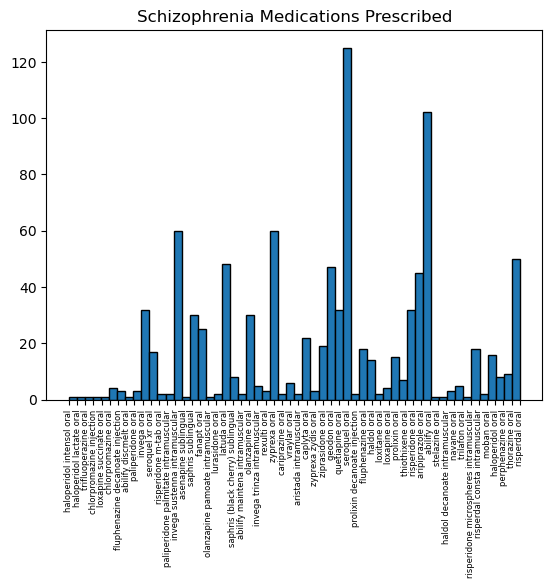

In [49]:
# Plot medication frequency
plt.title('Schizophrenia Medications Prescribed')
plt.xticks(rotation = 90, size = 6)
plt.hist(schizophrenia_reviews['drug_name'], bins = 56, align = 'mid', edgecolor = 'black')

(array([ 4.,  9., 12.,  4.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <BarContainer object of 4 artists>)

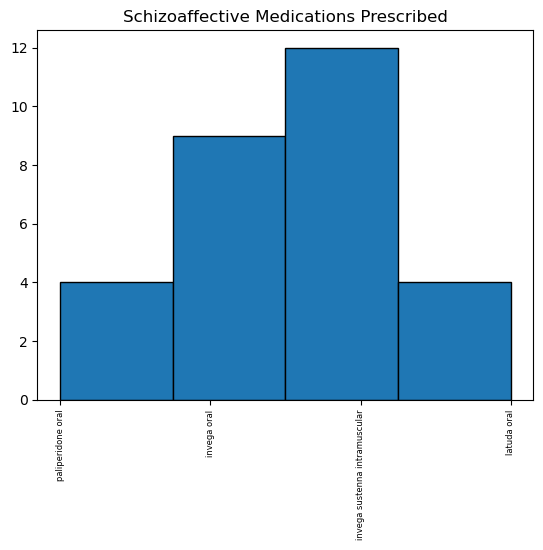

In [50]:
# Plot medication frequency
plt.xticks(rotation = 90, size = 6)
plt.title('Schizoaffective Medications Prescribed')
plt.hist(schizoaffective_reviews['drug_name'], bins = 4, align = 'mid', edgecolor = 'black')

It appears that our histograms point to invega intramuscular being the most popular choice for a schizoaffective diagnosis while seroquel oral is the most popular for pure schizophrenia. The two histogram plots tell us that there are different prescribing practices between pure schizophrenia and schizoaffective disorder. There is plenty more work to be done using the review data to determine how well each medication is perceived by those who take it.

In [52]:
# Confirm our readings of the histograms
pd.value_counts(schizophrenia_reviews['drug_name'])

drug_name
seroquel oral                             125
abilify oral                              102
invega sustenna intramuscular              60
zyprexa oral                               60
risperdal oral                             50
latuda oral                                48
geodon oral                                47
aripiprazole oral                          45
risperidone oral                           32
invega oral                                32
quetiapine oral                            32
olanzapine oral                            30
saphris sublingual                         30
fanapt oral                                25
caplyta oral                               22
ziprasidone oral                           19
fluphenazine oral                          18
risperdal consta intramuscular             18
seroquel xr oral                           17
haloperidol oral                           16
prolixin oral                              15
haldol oral             

In [53]:
# Confirm our reading of the histogram
pd.value_counts(schizoaffective_reviews['drug_name'])

drug_name
invega sustenna intramuscular    12
invega oral                       9
paliperidone oral                 4
latuda oral                       4
Name: count, dtype: int64

In [54]:
# Find the age groups of the dataset
schizophrenia_reviews['age'].unique()

array(['35-44', '13-18', '45-54', '19-24', '65-74', '25-34', '55-64',
       '12-jul', '6-mar'], dtype=object)

In [55]:
# The 12-jul and 6-mar entries need to be removed from the ages. Will not affect the histogram plots to follow

In [56]:
# Create the dfs for each age group
schizo_ages_13_18 = schizophrenia_reviews[(schizophrenia_reviews['age'] == '13-18')]
schizo_ages_19_24 = schizophrenia_reviews[(schizophrenia_reviews['age'] == '19-24')]
schizo_ages_25_34 = schizophrenia_reviews[(schizophrenia_reviews['age'] == '25-34')]
schizo_ages_35_44 = schizophrenia_reviews[(schizophrenia_reviews['age'] == '35-44')]
schizo_ages_45_54 = schizophrenia_reviews[(schizophrenia_reviews['age'] == '45-54')]
schizo_ages_55_64 = schizophrenia_reviews[(schizophrenia_reviews['age'] == '55-64')]
schizo_ages_65_74 = schizophrenia_reviews[(schizophrenia_reviews['age'] == '65-74')]


In [57]:
# Find the number of bins needed for each df plot
num_bins = [len(schizo_ages_13_18['drug_name'].unique()), len(schizo_ages_19_24['drug_name'].unique()), len(schizo_ages_25_34['drug_name'].unique()), len(schizo_ages_35_44['drug_name'].unique()), len(schizo_ages_45_54['drug_name'].unique()), len(schizo_ages_55_64['drug_name'].unique()), len(schizo_ages_65_74['drug_name'].unique())]
num_bins

[14, 28, 35, 39, 39, 28, 15]

#### Make all the plots for medications popularity per age group

(array([1., 1., 2., 1., 1., 4., 3., 3., 1., 8., 6., 1., 3., 3.]),
 array([ 0.        ,  0.92857143,  1.85714286,  2.78571429,  3.71428571,
         4.64285714,  5.57142857,  6.5       ,  7.42857143,  8.35714286,
         9.28571429, 10.21428571, 11.14285714, 12.07142857, 13.        ]),
 <BarContainer object of 14 artists>)

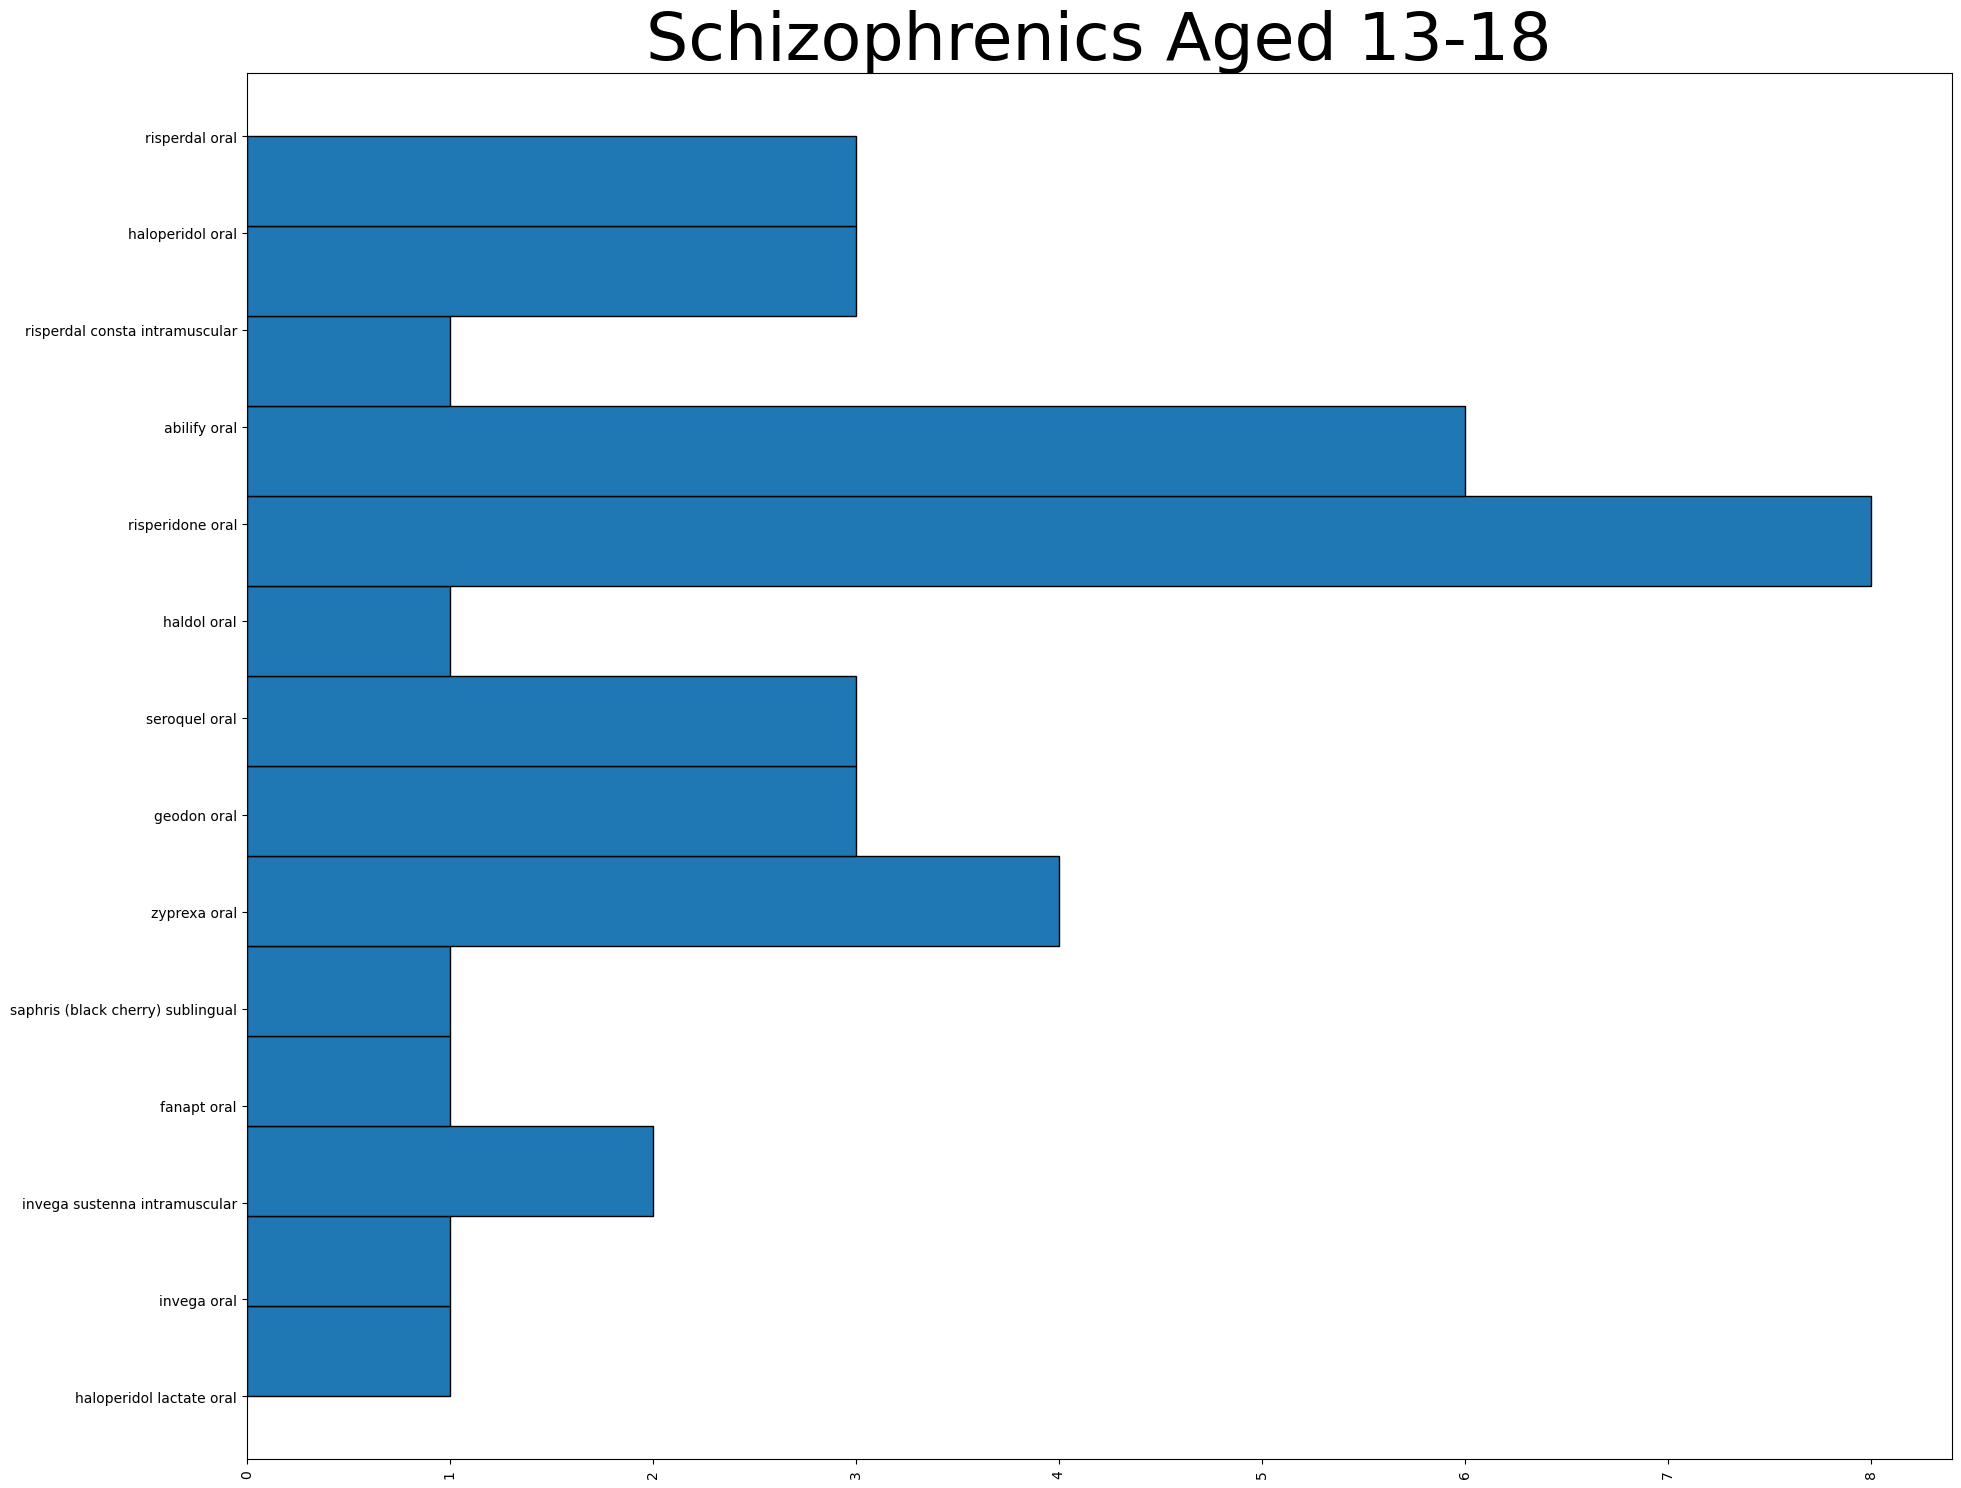

In [59]:
plt.figure(figsize = (22, 18))
plt.xticks(rotation = 90)
plt.title('Schizophrenics Aged 13-18', size = 48)
plt.hist(schizo_ages_13_18['drug_name'], bins = 14, edgecolor = 'black', orientation = 'horizontal')

(array([ 1.,  1.,  7.,  5., 14.,  2.,  4.,  4.,  1.,  6.,  9.,  4.,  1.,
         3.,  7.,  2., 11.,  3.,  3.,  1.,  2.,  3.,  7.,  3.,  1.,  2.,
         1.,  6.]),
 array([ 0.        ,  0.96428571,  1.92857143,  2.89285714,  3.85714286,
         4.82142857,  5.78571429,  6.75      ,  7.71428571,  8.67857143,
         9.64285714, 10.60714286, 11.57142857, 12.53571429, 13.5       ,
        14.46428571, 15.42857143, 16.39285714, 17.35714286, 18.32142857,
        19.28571429, 20.25      , 21.21428571, 22.17857143, 23.14285714,
        24.10714286, 25.07142857, 26.03571429, 27.        ]),
 <BarContainer object of 28 artists>)

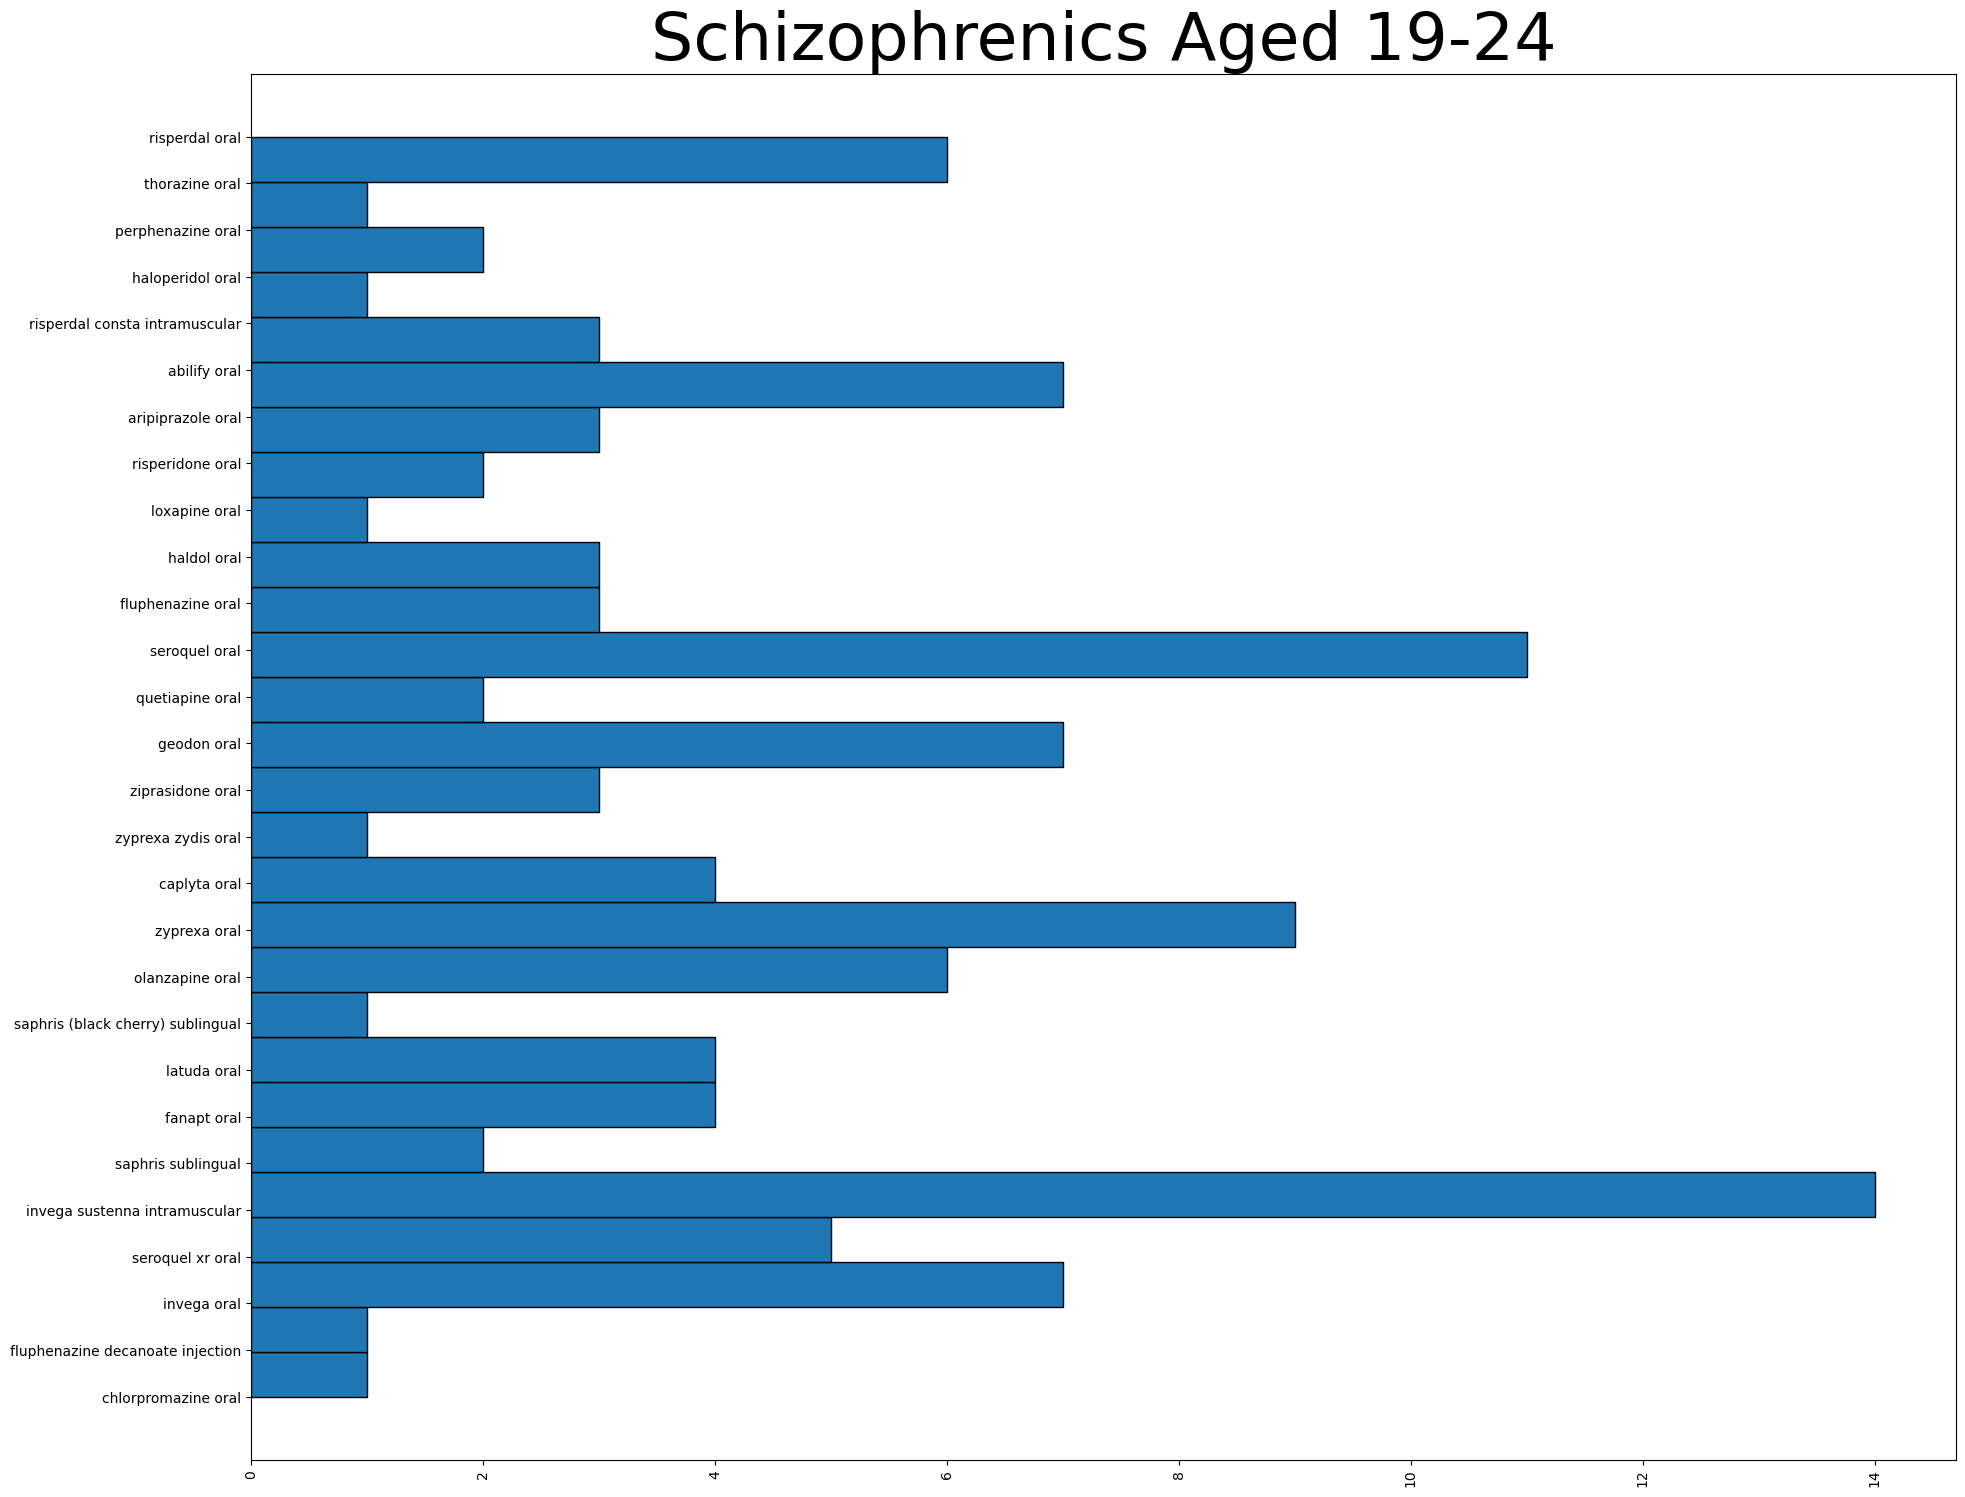

In [60]:
plt.figure(figsize = (22, 18))
plt.xticks(rotation = 90)
plt.title('Schizophrenics Aged 19-24', size = 48)
plt.hist(schizo_ages_19_24['drug_name'], bins = 28, edgecolor = 'black', orientation = 'horizontal')

(array([ 1.,  7.,  6.,  1., 19.,  1.,  6., 11.,  2.,  8.,  2.,  8.,  2.,
        18.,  1.,  1., 10.,  5., 10., 14., 41.,  6.,  4.,  1.,  6., 10.,
        21., 28.,  1.,  1.,  5.,  2.,  3.,  4., 19.]),
 array([ 0.        ,  0.97142857,  1.94285714,  2.91428571,  3.88571429,
         4.85714286,  5.82857143,  6.8       ,  7.77142857,  8.74285714,
         9.71428571, 10.68571429, 11.65714286, 12.62857143, 13.6       ,
        14.57142857, 15.54285714, 16.51428571, 17.48571429, 18.45714286,
        19.42857143, 20.4       , 21.37142857, 22.34285714, 23.31428571,
        24.28571429, 25.25714286, 26.22857143, 27.2       , 28.17142857,
        29.14285714, 30.11428571, 31.08571429, 32.05714286, 33.02857143,
        34.        ]),
 <BarContainer object of 35 artists>)

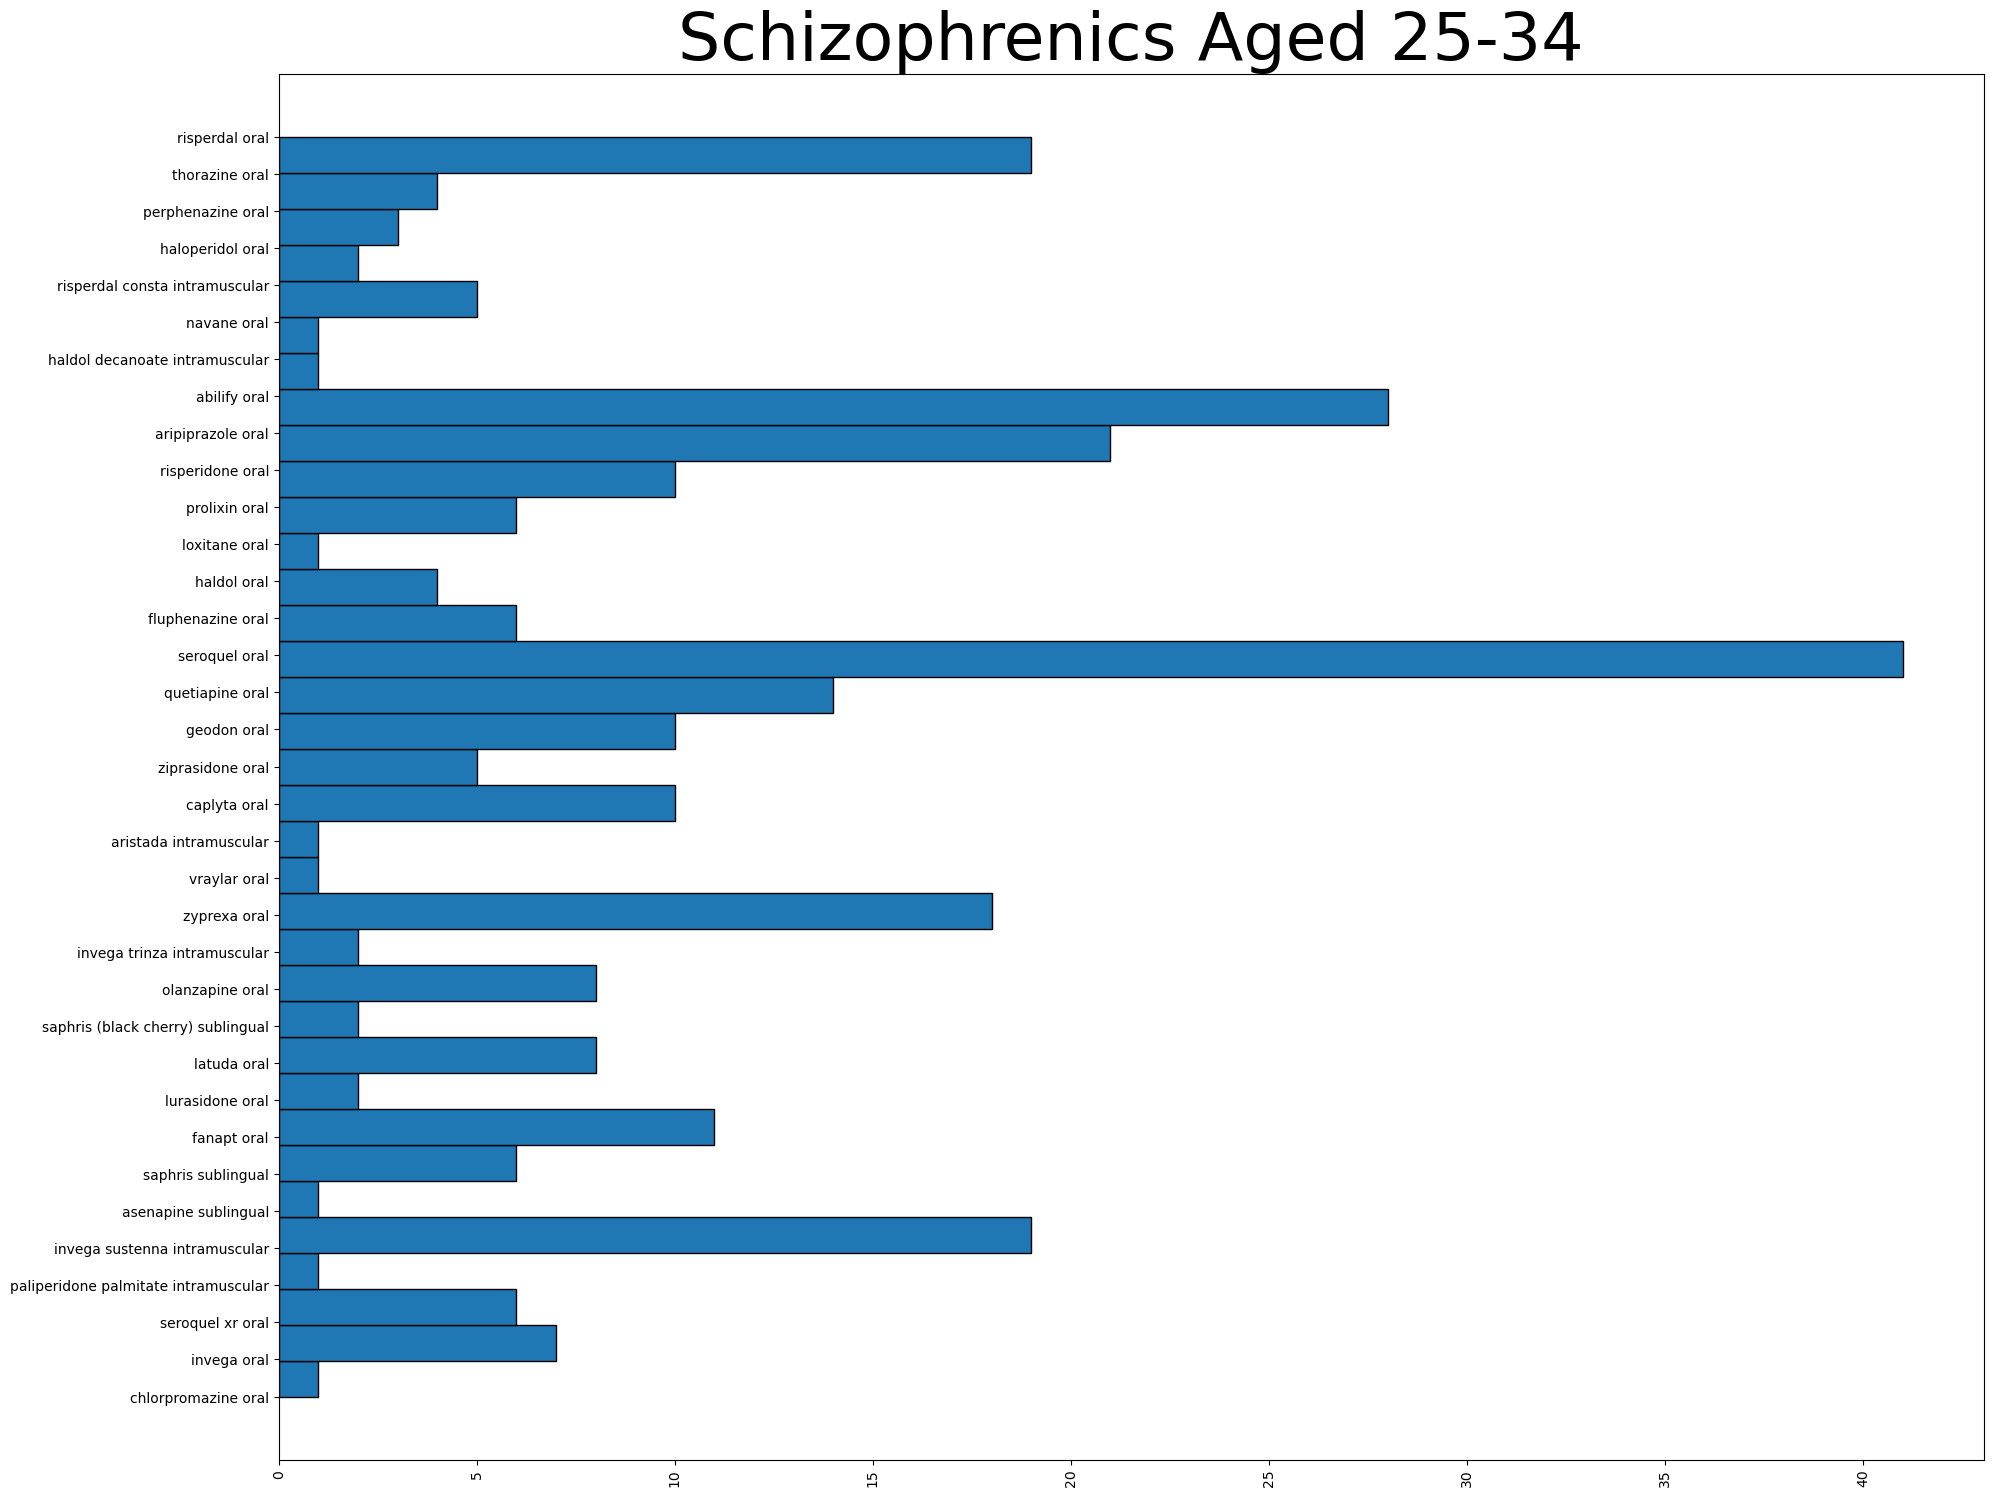

In [61]:
plt.figure(figsize = (22, 18))
plt.xticks(rotation = 90)
plt.title('Schizophrenics Aged 25-34', size = 48)
plt.hist(schizo_ages_25_34['drug_name'], bins = 35, edgecolor = 'black', orientation = 'horizontal')

(array([ 1.,  1.,  1.,  1.,  2.,  6.,  3.,  1., 14.,  9.,  6., 18.,  2.,
         1.,  3., 13.,  1.,  6.,  1.,  8., 17.,  8., 26.,  3.,  2.,  1.,
         1.,  3.,  2.,  8.,  9., 28.,  1.,  3.,  2.,  3.,  2.,  3., 10.]),
 array([ 0.        ,  0.97435897,  1.94871795,  2.92307692,  3.8974359 ,
         4.87179487,  5.84615385,  6.82051282,  7.79487179,  8.76923077,
         9.74358974, 10.71794872, 11.69230769, 12.66666667, 13.64102564,
        14.61538462, 15.58974359, 16.56410256, 17.53846154, 18.51282051,
        19.48717949, 20.46153846, 21.43589744, 22.41025641, 23.38461538,
        24.35897436, 25.33333333, 26.30769231, 27.28205128, 28.25641026,
        29.23076923, 30.20512821, 31.17948718, 32.15384615, 33.12820513,
        34.1025641 , 35.07692308, 36.05128205, 37.02564103, 38.        ]),
 <BarContainer object of 39 artists>)

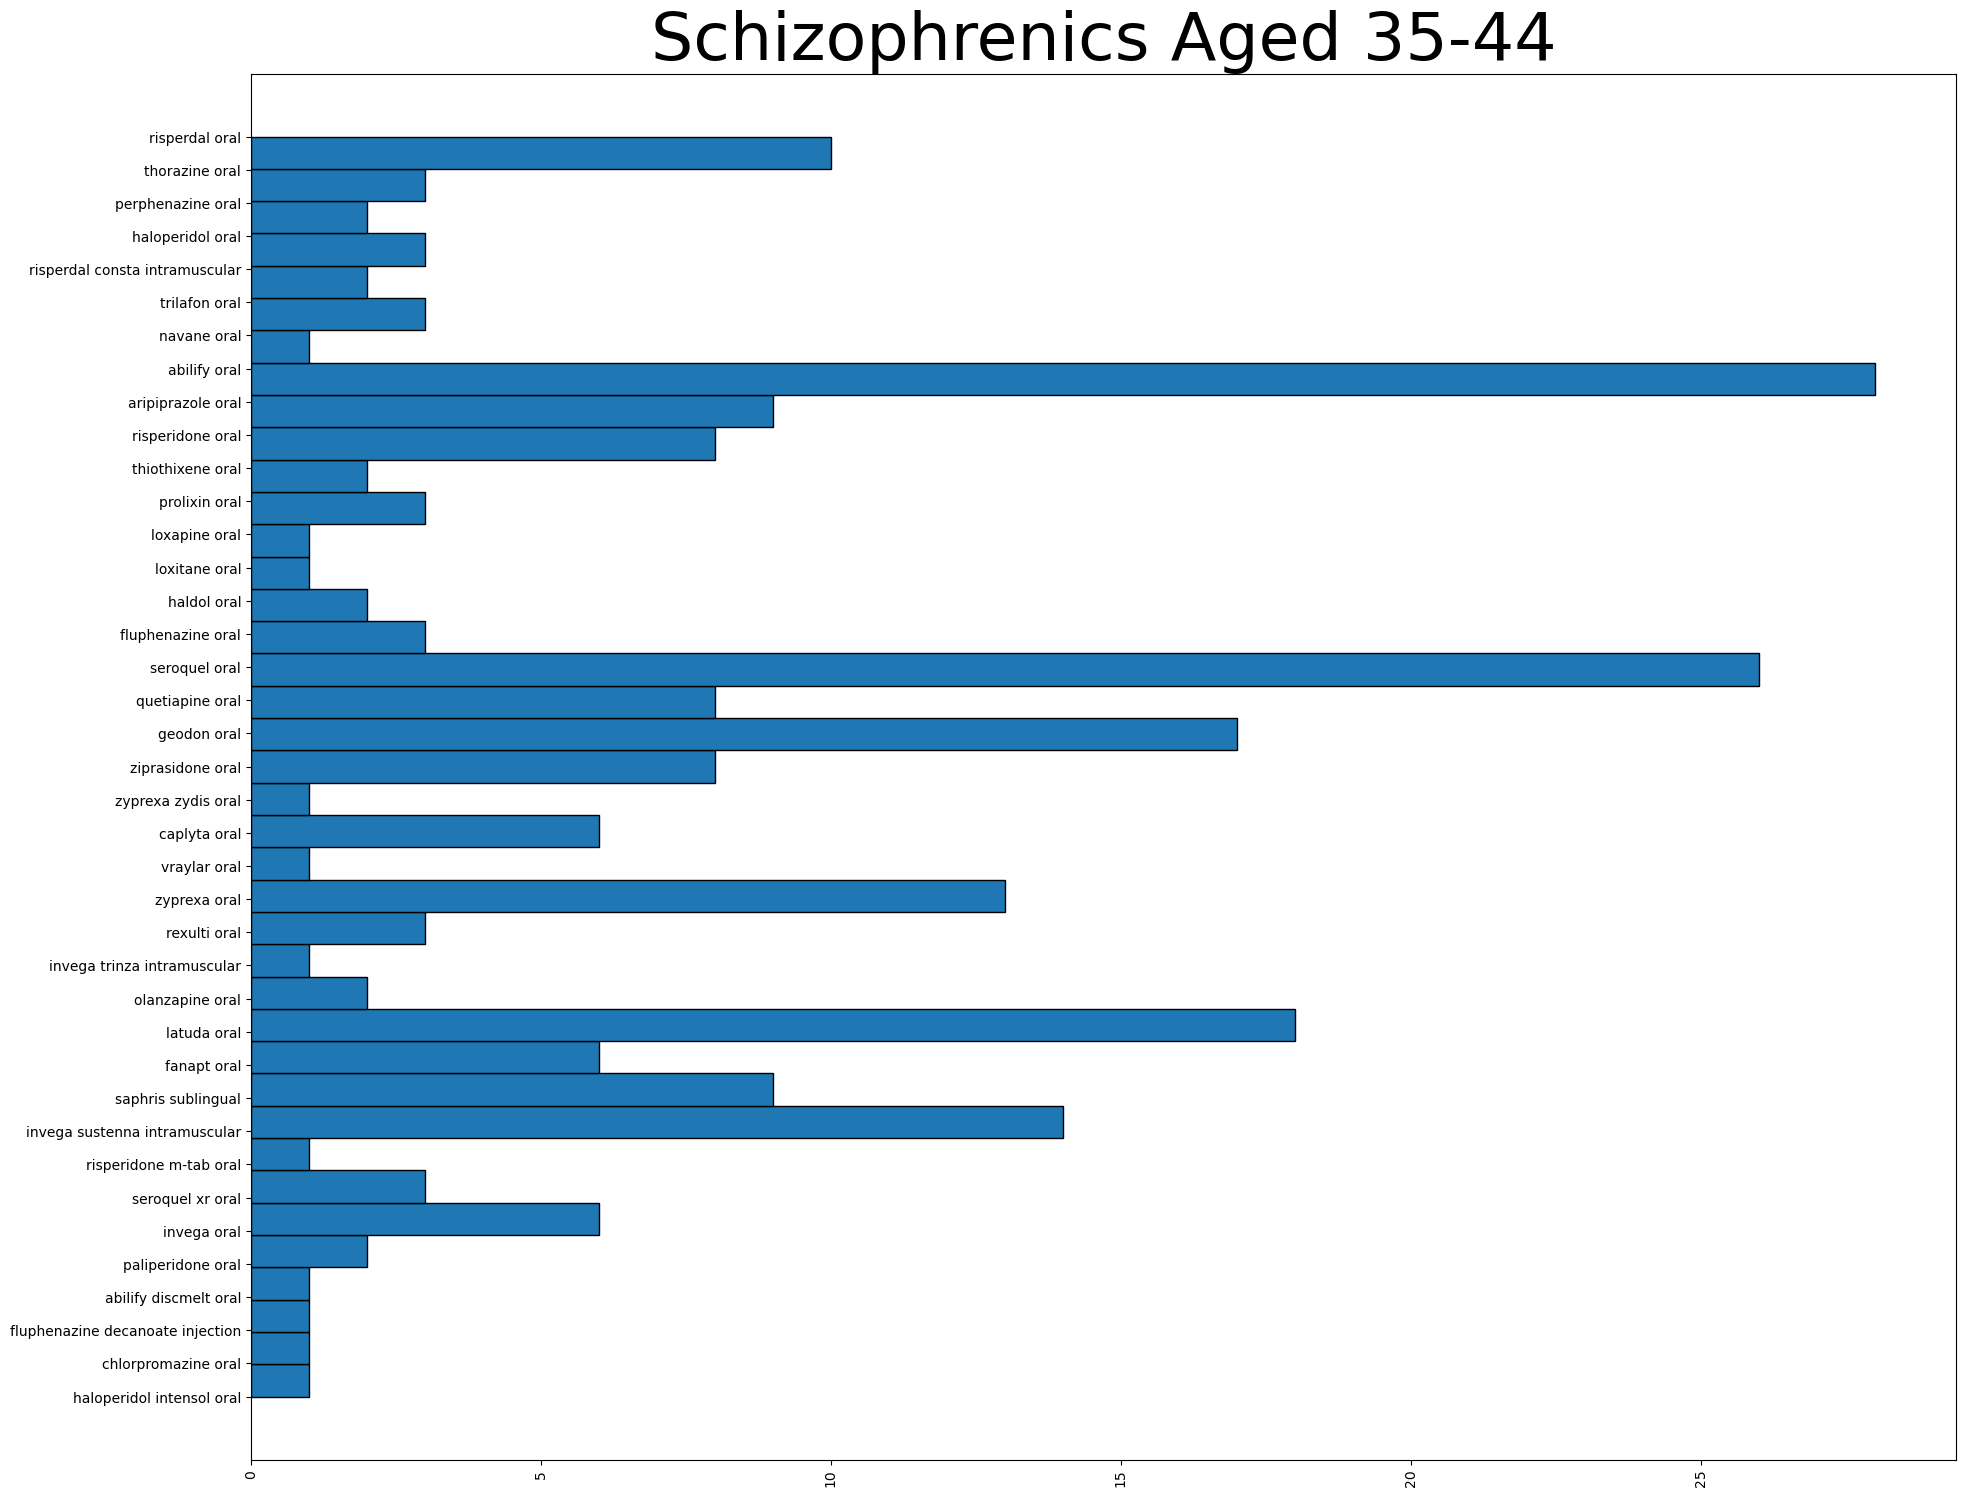

In [62]:
plt.figure(figsize = (22, 18))
plt.xticks(rotation = 90)
plt.title('Schizophrenics Aged 35-44', size = 48)
plt.hist(schizo_ages_35_44['drug_name'], bins = 39, edgecolor = 'black', orientation = 'horizontal')

(array([ 1.,  1.,  1.,  8.,  3.,  1.,  6.,  8.,  2.,  1., 11.,  2.,  1.,
         4.,  1., 10.,  2.,  2.,  1.,  1.,  2.,  8.,  4., 29.,  1.,  3.,
         3.,  1.,  3.,  3.,  4., 12., 17.,  2.,  1.,  3.,  6.,  1., 10.]),
 array([ 0.        ,  0.97435897,  1.94871795,  2.92307692,  3.8974359 ,
         4.87179487,  5.84615385,  6.82051282,  7.79487179,  8.76923077,
         9.74358974, 10.71794872, 11.69230769, 12.66666667, 13.64102564,
        14.61538462, 15.58974359, 16.56410256, 17.53846154, 18.51282051,
        19.48717949, 20.46153846, 21.43589744, 22.41025641, 23.38461538,
        24.35897436, 25.33333333, 26.30769231, 27.28205128, 28.25641026,
        29.23076923, 30.20512821, 31.17948718, 32.15384615, 33.12820513,
        34.1025641 , 35.07692308, 36.05128205, 37.02564103, 38.        ]),
 <BarContainer object of 39 artists>)

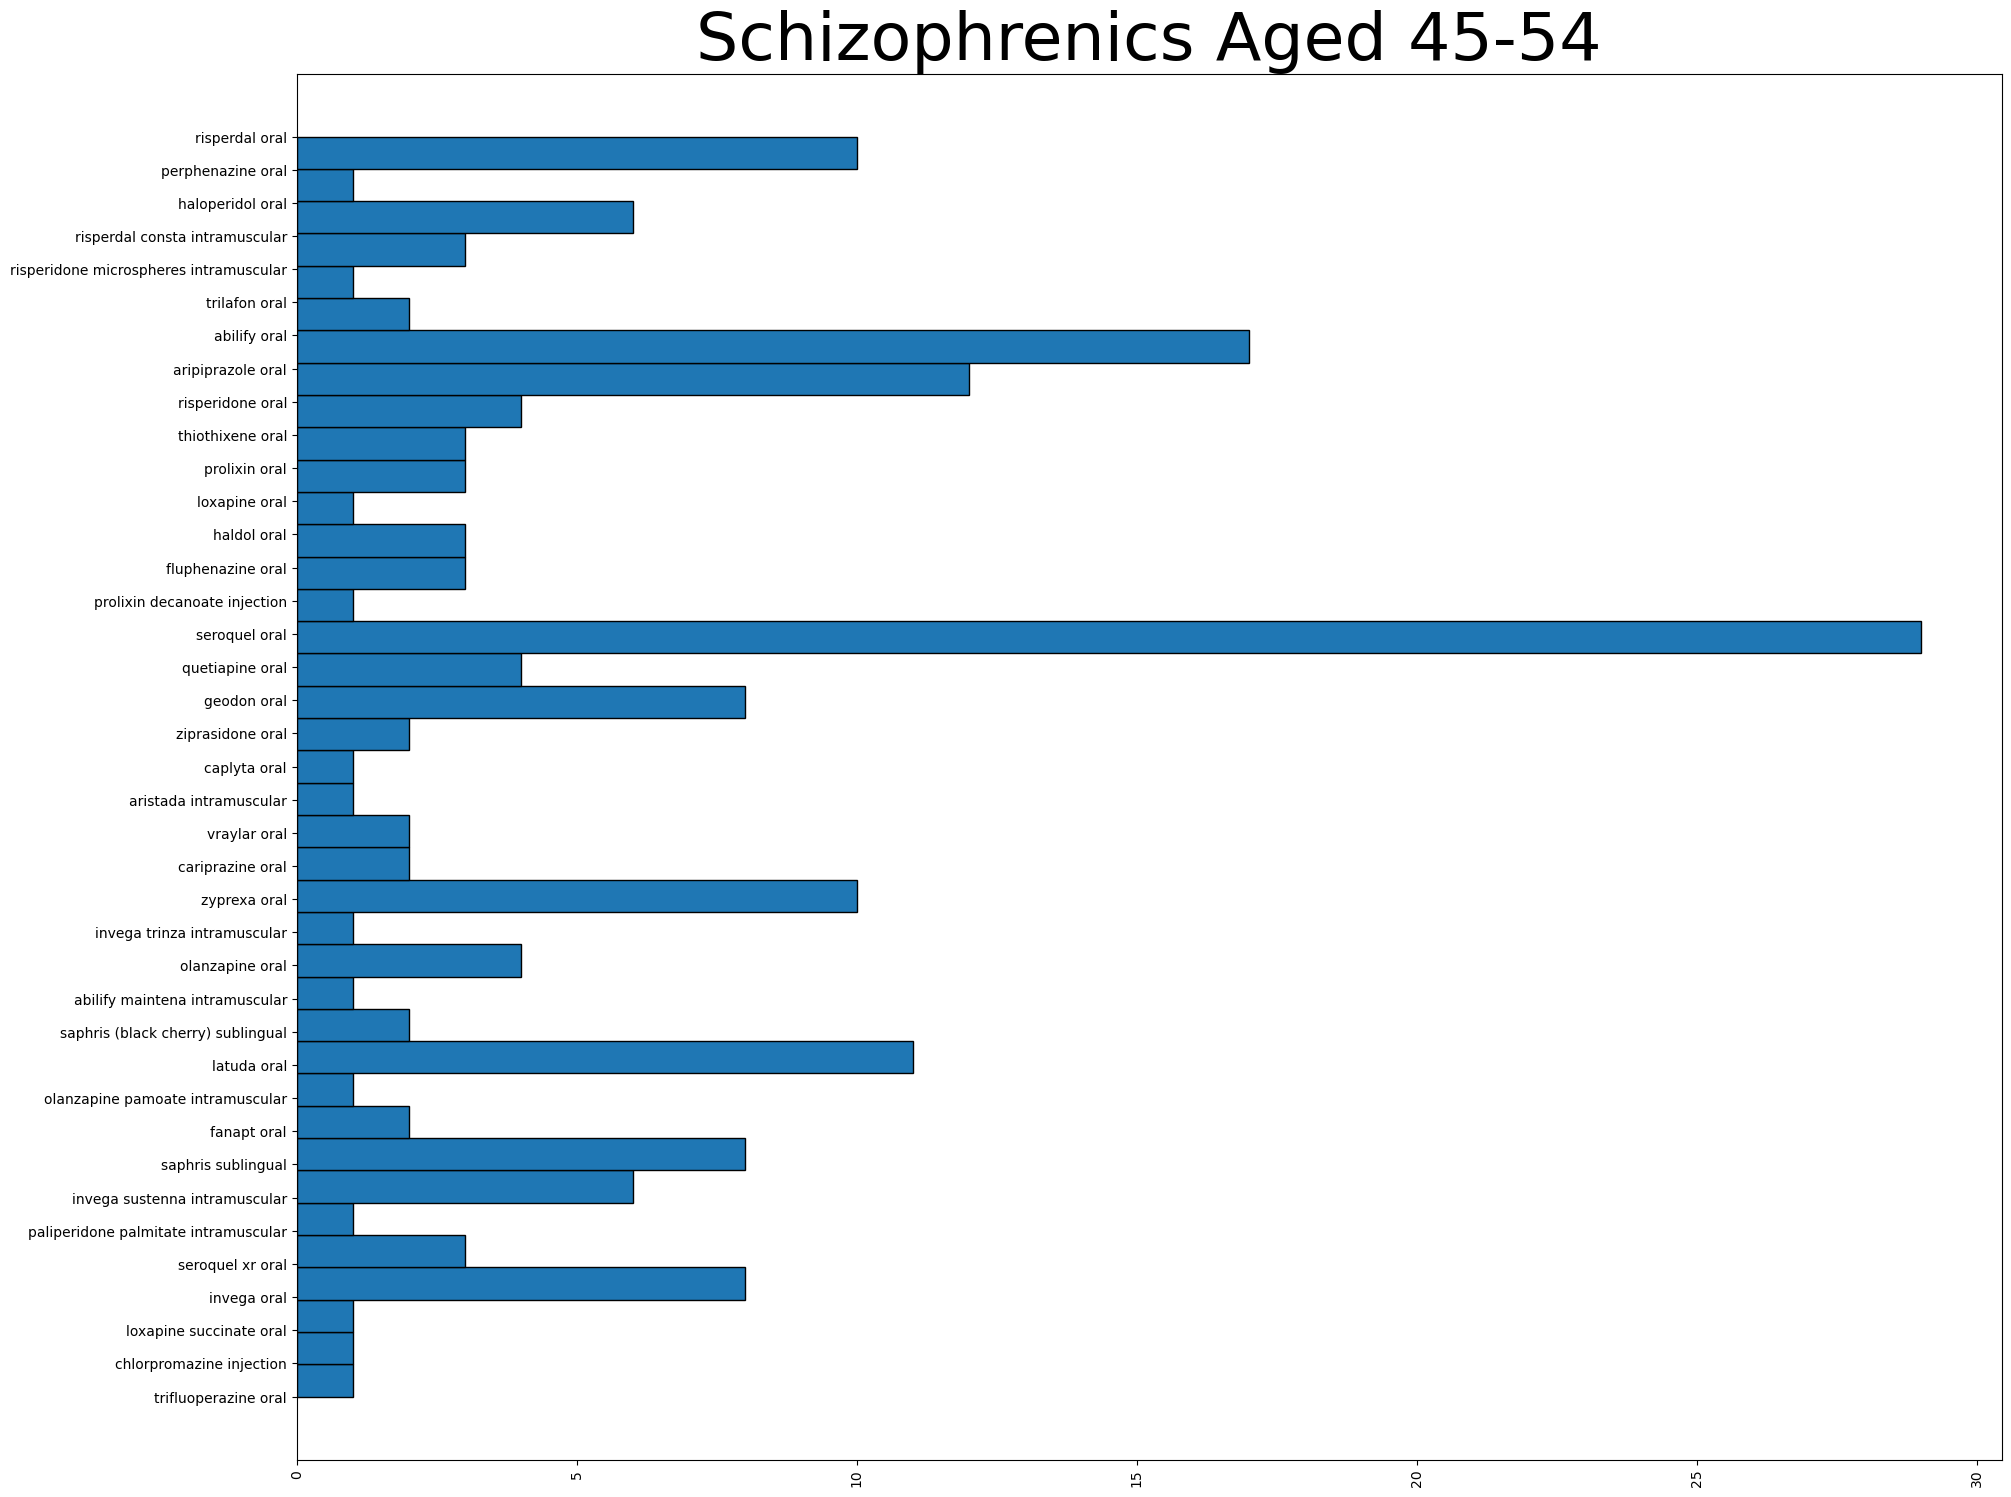

In [63]:
plt.figure(figsize = (22, 18))
plt.xticks(rotation = 90)
plt.title('Schizophrenics Aged 45-54', size = 48)
plt.hist(schizo_ages_45_54['drug_name'], bins = 39, edgecolor = 'black', orientation = 'horizontal')

(array([ 1.,  1.,  2.,  1.,  3.,  5.,  1.,  6.,  1.,  1.,  6.,  5.,  2.,
         1.,  1.,  1.,  2., 10.,  1.,  1.,  3.,  2., 11.,  1.,  3.,  2.,
         1.,  2.]),
 array([ 0.        ,  0.96428571,  1.92857143,  2.89285714,  3.85714286,
         4.82142857,  5.78571429,  6.75      ,  7.71428571,  8.67857143,
         9.64285714, 10.60714286, 11.57142857, 12.53571429, 13.5       ,
        14.46428571, 15.42857143, 16.39285714, 17.35714286, 18.32142857,
        19.28571429, 20.25      , 21.21428571, 22.17857143, 23.14285714,
        24.10714286, 25.07142857, 26.03571429, 27.        ]),
 <BarContainer object of 28 artists>)

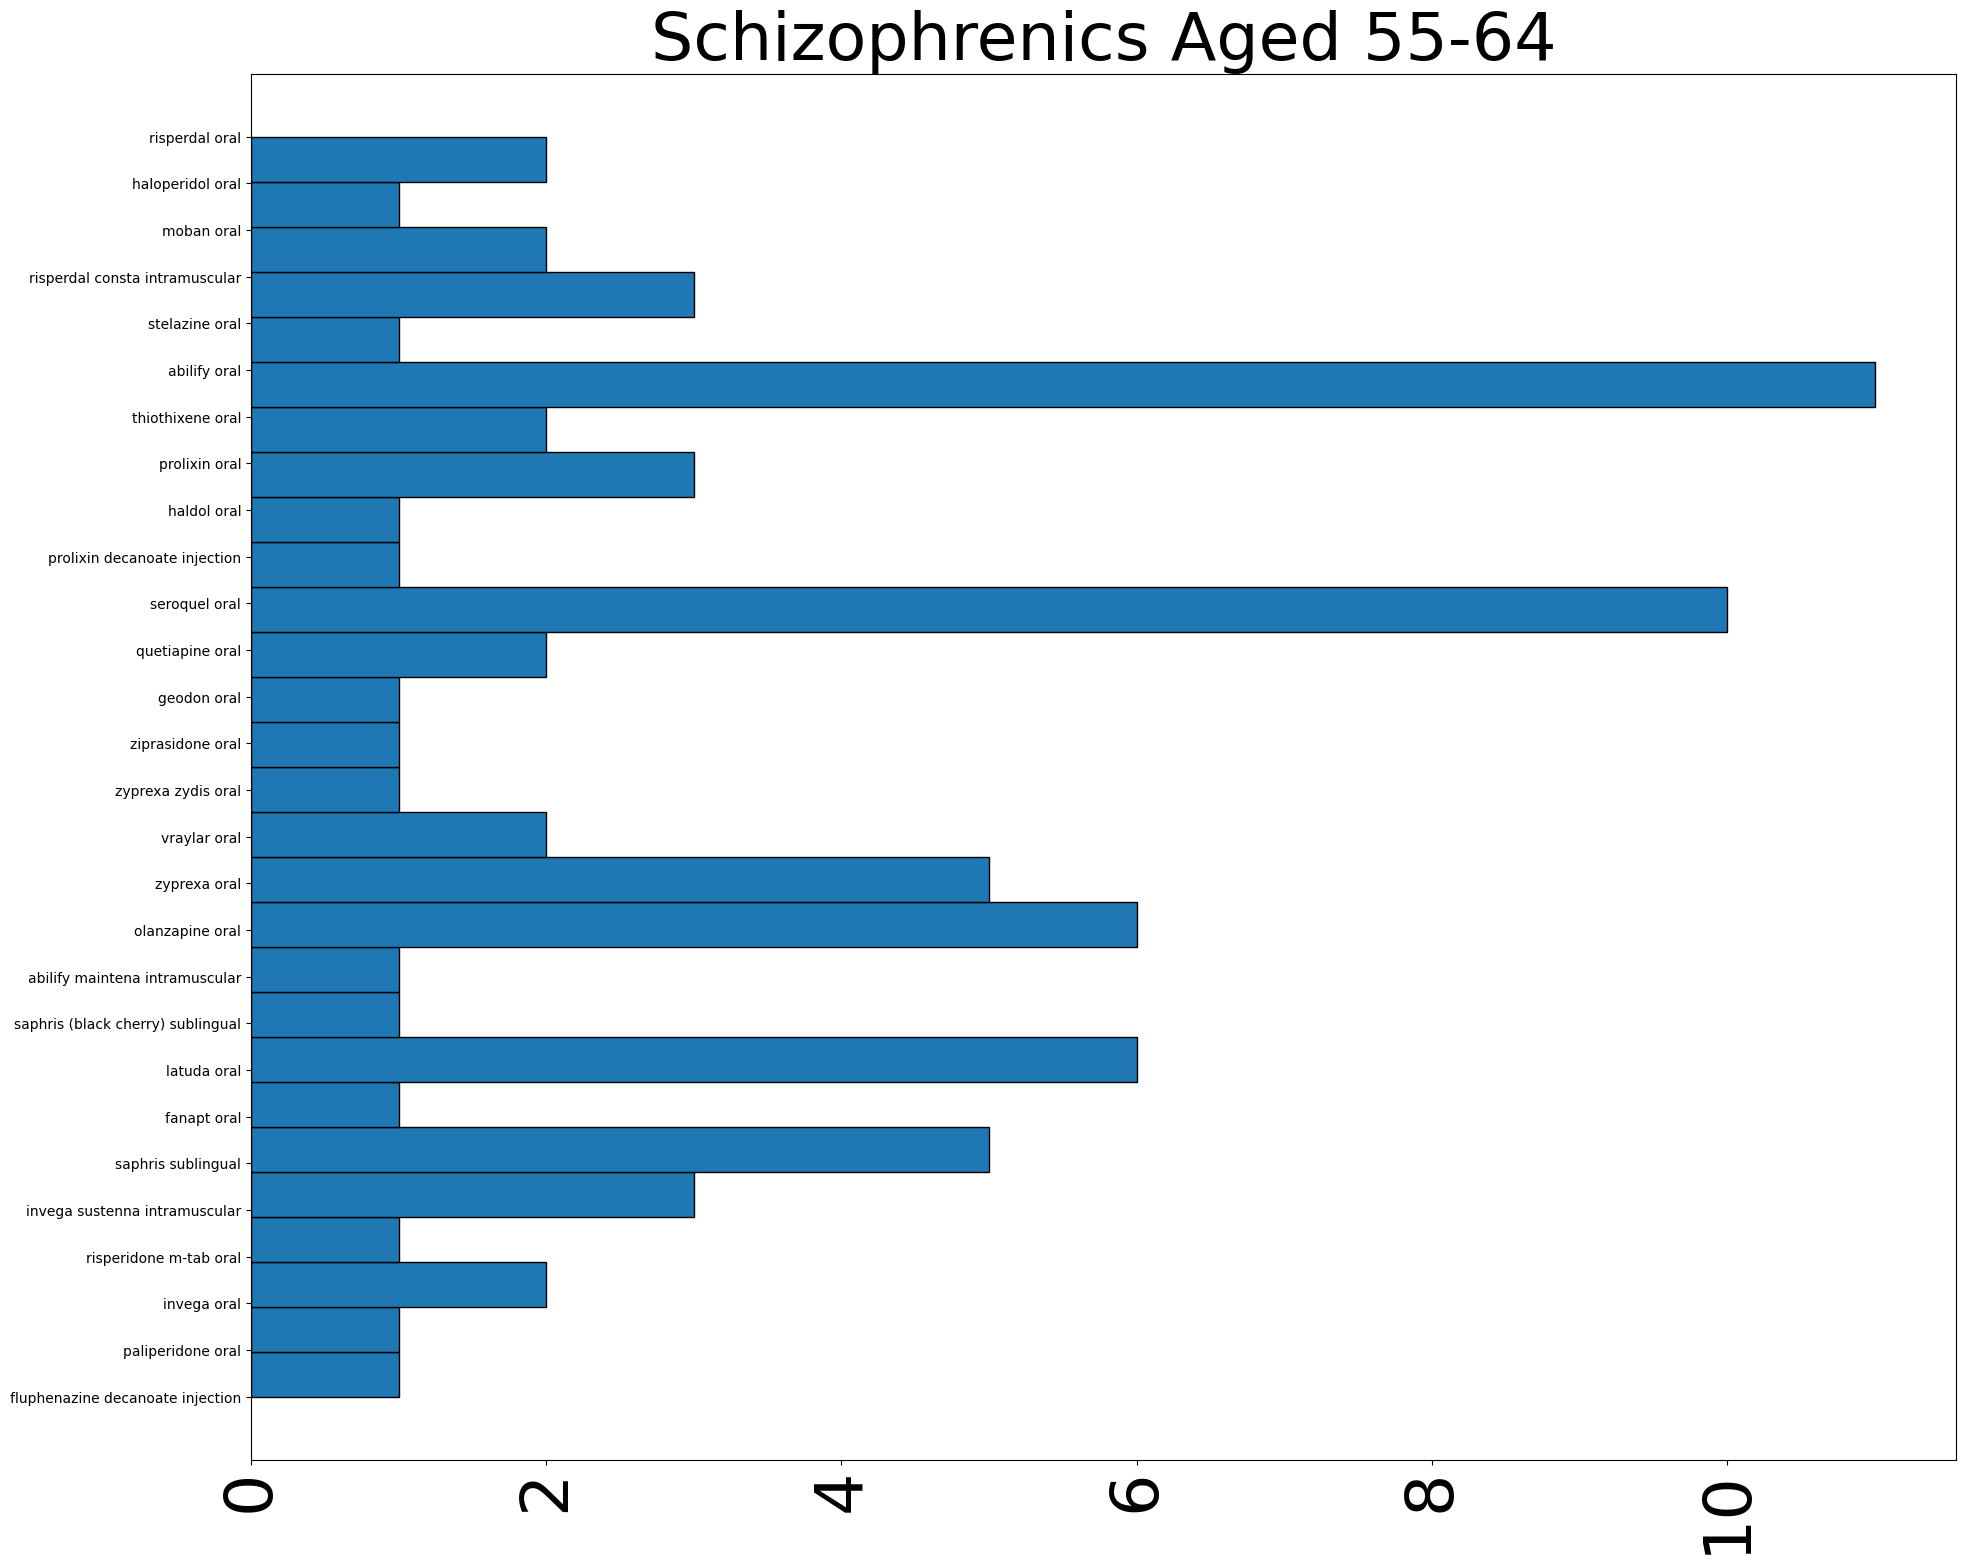

In [64]:
plt.figure(figsize = (22, 18))
plt.xticks(rotation = 90, size = 48)
plt.title('Schizophrenics Aged 55-64', size = 48)
plt.hist(schizo_ages_55_64['drug_name'], bins = 28, edgecolor = 'black', orientation = 'horizontal')

(array([1., 2., 1., 1., 4., 1., 1., 2., 3., 3., 1., 4., 1., 1., 1.]),
 array([ 0.        ,  0.93333333,  1.86666667,  2.8       ,  3.73333333,
         4.66666667,  5.6       ,  6.53333333,  7.46666667,  8.4       ,
         9.33333333, 10.26666667, 11.2       , 12.13333333, 13.06666667,
        14.        ]),
 <BarContainer object of 15 artists>)

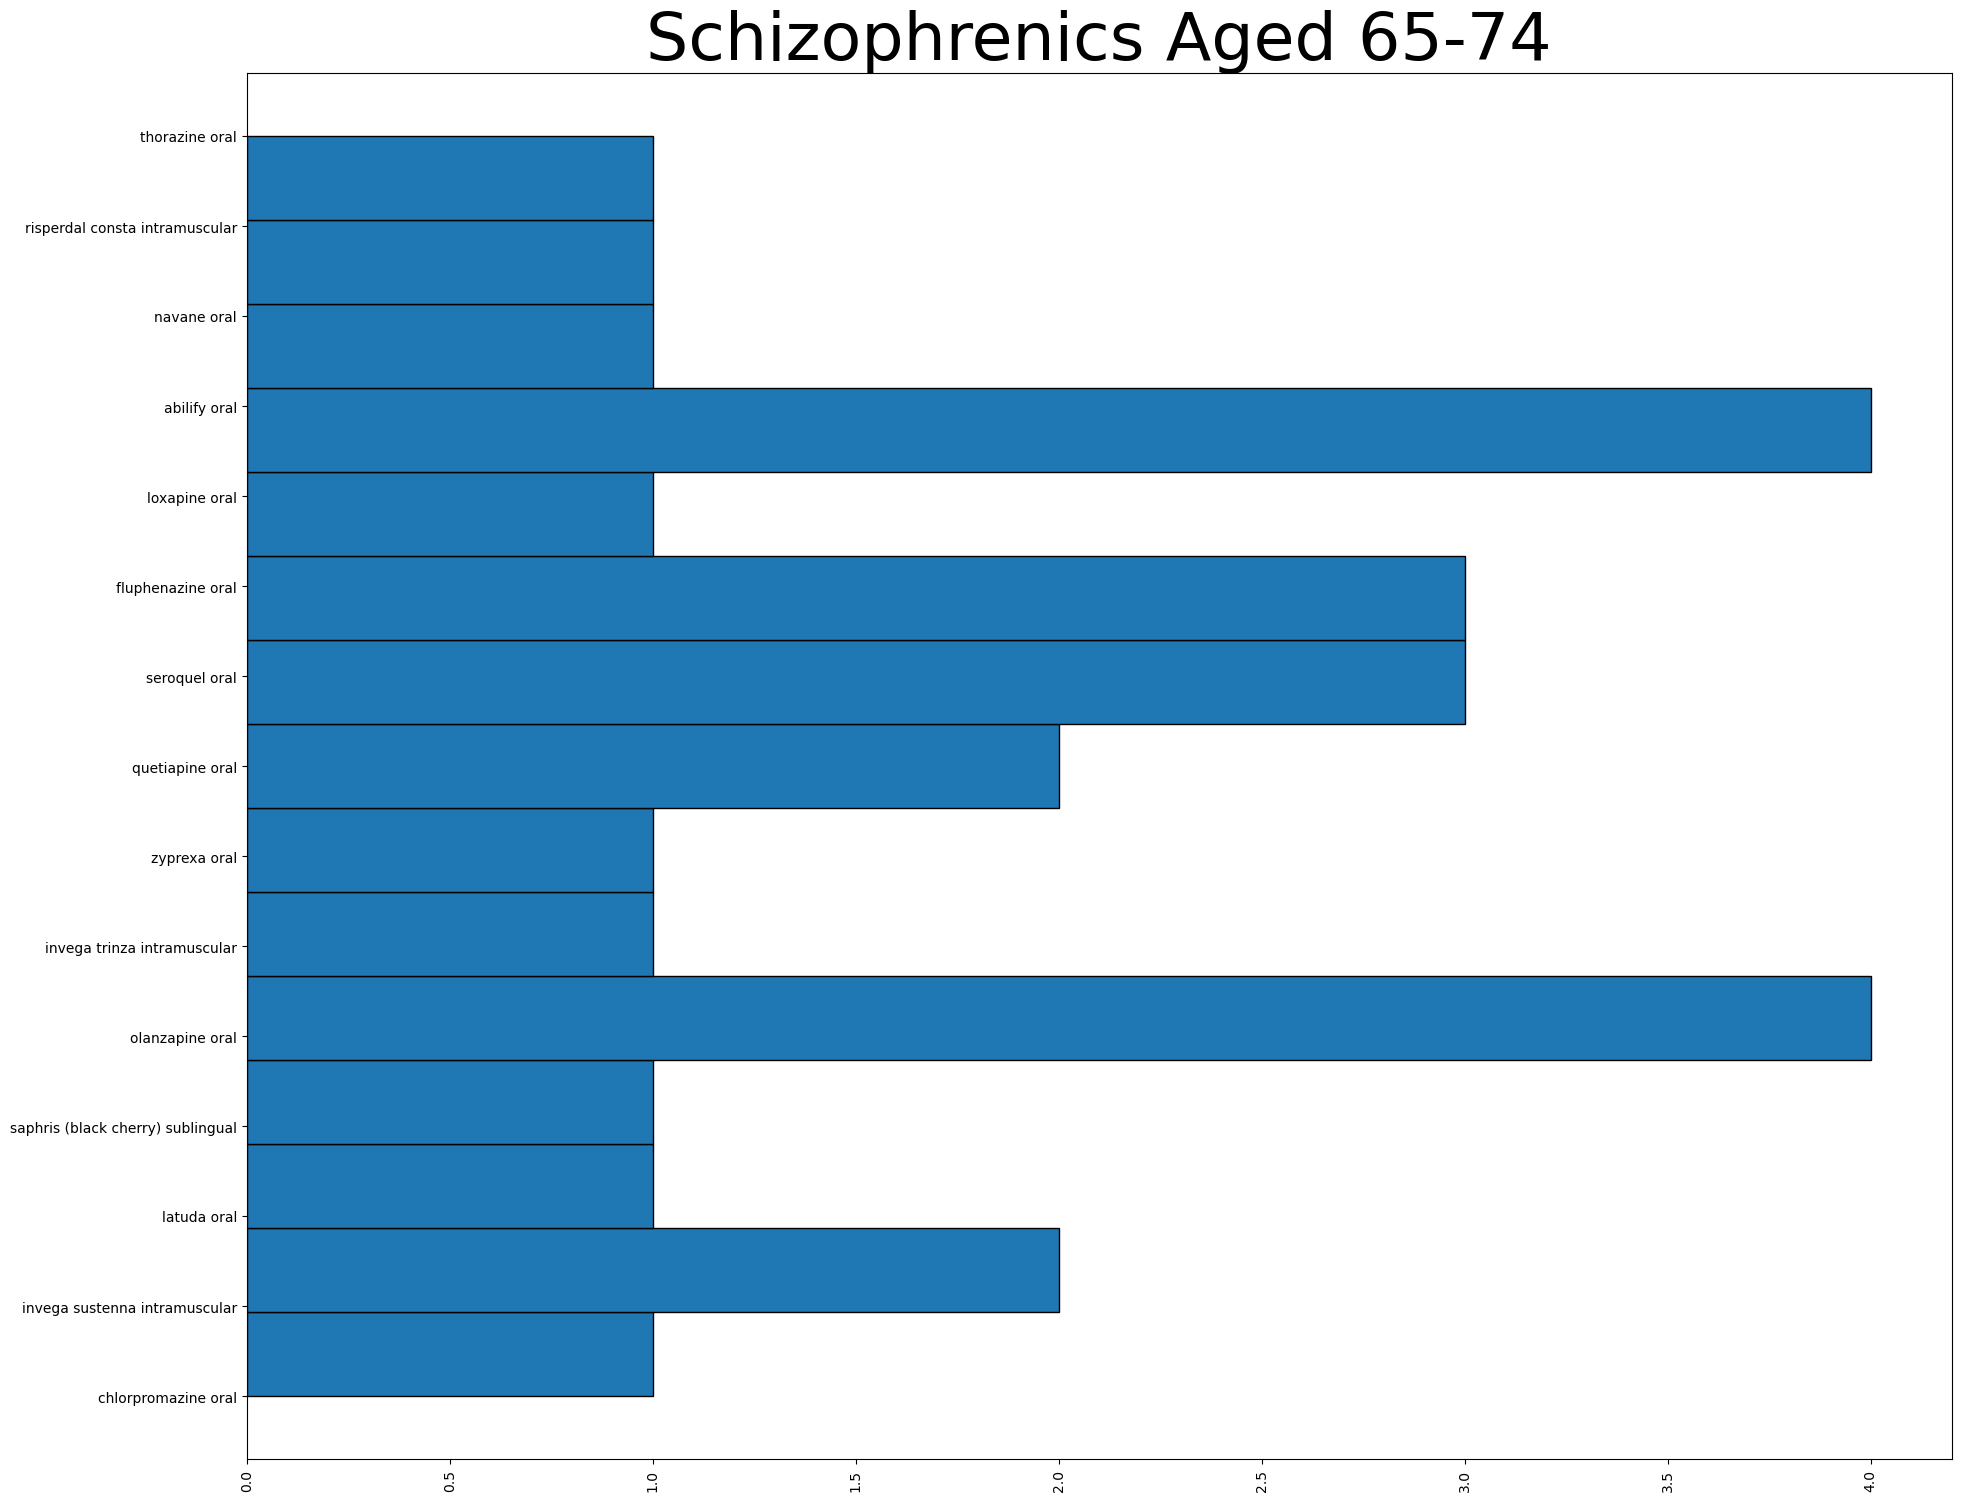

In [65]:
plt.figure(figsize = (22, 18))
plt.xticks(rotation = 90)
plt.title('Schizophrenics Aged 65-74', size = 48)
plt.hist(schizo_ages_65_74['drug_name'], bins = 15, edgecolor = 'black', orientation = 'horizontal')

This batch of histograms shows the popularity of medications per age group in the WebMD review dataset. Risperidone was the most popular among those aged 13-18. Seroquel oral was the most popular in several age groups and Abilify was popular in most groups, leading the 35-44 and 55-64 age groups and tying for first in the 65-74. Zyprexa, Latuda, and Invega Intramuscular were also very popular and among the top five in most groups. I have yet to do sentiment analysis on the reviews but once that is done and fed into the model we can see if the popular medications have more favorable reviews.